# Tanzania Water Pump Competition

https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/

## Overview of Business Problem

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests

#import data
TrainingSetValues = pd.read_csv('data/Training_Set.csv')
TrainingSetLabels = pd.read_csv('data/Set_Labels.csv')
TestSetValues = pd.read_csv('data/Testing_Set.csv')

In [2]:
#preview data
TrainingSetValues

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
#preview data
TrainingSetLabels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [4]:
#preview data
TestSetValues

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [5]:
#merge training set for final dataframe
df = pd.merge(TrainingSetValues, TrainingSetLabels, on="id")
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [6]:
#previewing the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### Data Dictionary

from:https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

amount_tsh - Total static head (amount water available to waterpoint) <br>
date_recorded - The date the row was entered </font><br>
funder - Who funded the well<br>
gps_height - Altitude of the well<br>
installer - Organization that installed the well<br>
longitude - GPS coordinate<br>
latitude - GPS coordinate<br>
wpt_name - Name of the waterpoint if there is one<br>
num_private - <font color='red'>DELETE?</font><br>
basin - Geographic water basin<br>
subvillage - Geographic location<br>
region - Geographic location<br>
region_code - Geographic location (coded)<br>
district_code - Geographic location (coded)<br>
lga - Geographic location<br>
ward - Geographic location<br>
population - Population around the well<br>
public_meeting - True/False<br>
recorded_by - Group entering this row of data <font color='red'>MAYBE DELETE?</font><br>
scheme_management - Who operates the waterpoint<br>
scheme_name - Who operates the waterpoint <font color='red'>DELETE</font> <br>
permit - If the waterpoint is permitted<br>
construction_year - Year the waterpoint was constructed<br>
extraction_type - The kind of extraction the waterpoint uses<br>
extraction_type_group - The kind of extraction the waterpoint uses<br>
extraction_type_class - The kind of extraction the waterpoint uses<br>
management - How the waterpoint is managed<br>
management_group - How the waterpoint is managed<br>
payment - What the water costs<br>
payment_type - What the water costs<br>
water_quality - The quality of the water<br>
quality_group - The quality of the water<br>
quantity - The quantity of water<br>
quantity_group - The quantity of water<br>
source - The source of the water<br>
source_type - The source of the water<br>
source_class - The source of the water<br>
waterpoint_type - The kind of waterpoint<br>
waterpoint_type_group - The kind of waterpoint<br>

Let's check to see if there are duplicate longitude/latitude pairs.

In [158]:
df[['longitude', 'latitude']].value_counts()

longitude  latitude     
0.000000   -2.000000e-08    1812
37.252194  -7.103742e+00       2
37.274352  -7.102004e+00       2
37.250111  -7.104625e+00       2
39.099069  -6.980122e+00       2
                            ... 
36.697381  -2.733935e+00       1
36.697309  -8.092875e+00       1
36.697063  -8.110059e+00       1
36.697013  -3.350101e+00       1
35.004312  -9.478077e+00       1
Length: 57451, dtype: int64

In [10]:
#drop duplicate wells
for item in df['longitude'].value_counts()[df['longitude'].value_counts() == 2].index:
    df.drop(index = np.where(df.longitude == item)[0][0], inplace = True)
    
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [11]:
#preview erroneous data
df[df['longitude'] == 0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,...,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
59208,3631,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
59324,748,0.0,2013-01-22,World Vision,0,World Vision,0.0,-2.000000e-08,Mwazwilo,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Let's convert `date_recorded` to a timestamp.

In [12]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
type(df['date_recorded'][0])

pandas._libs.tslibs.timestamps.Timestamp

Let's calculate age of the well for each data entry.

In [13]:
df['year_recorded'] = pd.DatetimeIndex(df['date_recorded']).year
df['age_well'] = df['year_recorded'] - df['construction_year']

df['age_well'] = np.where(df['age_well'] >= 0, df['age_well'], np.nan)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,age_well
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,12.0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3.0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,4.0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,27.0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2013,14.0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,2011,15.0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011,2011.0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011,2011.0


In [14]:
#previewing ages
df['age_well'].value_counts()

2011.0    13332
2012.0     5136
3.0        2739
1.0        2299
2013.0     2207
2.0        2128
5.0        1976
4.0        1885
13.0       1865
7.0        1400
6.0        1378
11.0       1351
8.0        1159
14.0       1159
33.0       1119
15.0        991
23.0        904
10.0        867
16.0        825
9.0         813
19.0        765
27.0        762
18.0        752
28.0        709
31.0        708
35.0        644
17.0        635
39.0        600
37.0        599
26.0        589
0.0         586
25.0        583
21.0        577
29.0        564
12.0        559
20.0        540
41.0        488
30.0        359
43.0        355
38.0        351
36.0        325
22.0        323
24.0        260
40.0        233
34.0        183
32.0        174
53.0         91
42.0         90
50.0         84
45.0         66
46.0         48
44.0         47
48.0         41
51.0         31
49.0         25
47.0         14
2004.0       13
52.0         11
2002.0        1
Name: age_well, dtype: int64

In [15]:
#dropping some work to calculate age
df = df.drop(labels='year_recorded', axis=1)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age_well
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,12.0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,3.0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,4.0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,27.0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,14.0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,15.0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011.0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011.0


Let's visualize where our data points are geographically

In [16]:
#import basemap
import os
os.environ["PROJ_LIB"] = r'C:\Users\17178\anaconda3\envs\learn-env\Library\share\basemap'
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


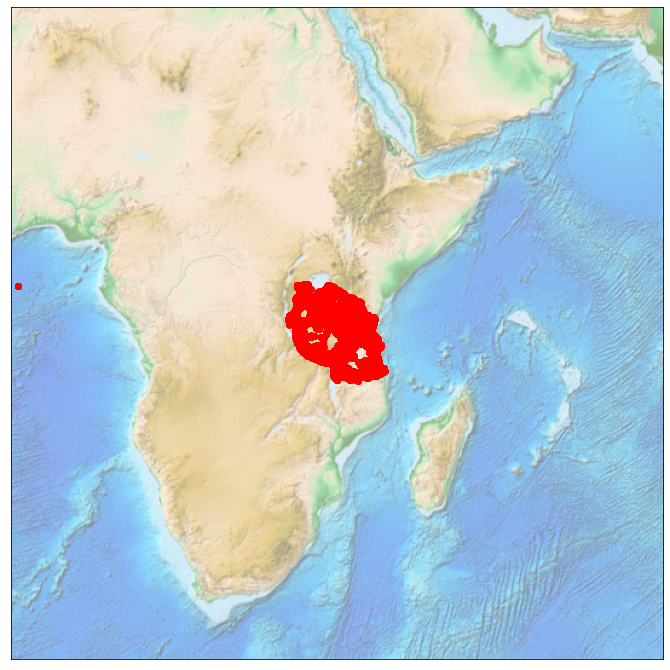

In [17]:
#plotting latitude/longitude
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-6.392, lon_0=35.002)
#            llcrnrlon=-13, llcrnrlat=28,
#            urcrnrlon=.25, urcrnrlat=42)
m.etopo(scale=.5, alpha=0.5)

lat = df['latitude'].values
long = df['longitude'].values

# Map (long, lat) to (x, y) for plotting
x,y = m(long,lat)
m.plot(x,y,'ro','markersize=3');

In [18]:
#let's split latitude/longitude into 4 quadrants: NE, NW, SE, SW based on m(35, -6.4). Long = 0 will be 'missing'

conditions = [df['longitude'] == 0, (df['longitude'] > 35) & (df['latitude'] > -6.4), 
              (df['longitude'] > 35) & (df['latitude'] <= -6.4), (df['longitude'] <= 35) & (df['latitude'] > -6.4),
             (df['longitude'] <= 35) & (df['latitude'] <= -6.4)]

choices = ['missing', 'NE', 'SE', 'NW', 'SW']

df['geographical_split'] = np.select(conditions, choices)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age_well,geographical_split
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,12.0,SW
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,3.0,NW
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,4.0,NE
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,27.0,SE
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011.0,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,14.0,NE
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,15.0,SE
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011.0,SW
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011.0,NE


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


''

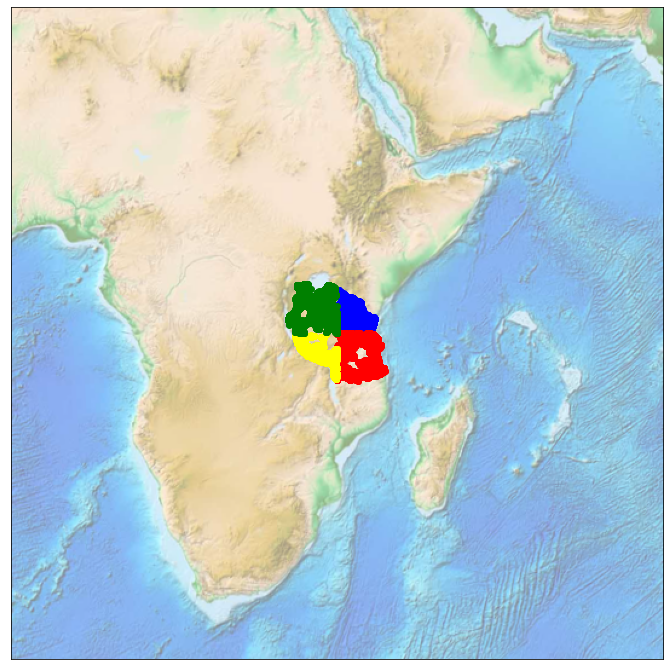

In [19]:
#let's plot these geographical splits (NW/NE/SE/SW)
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-6.392, lon_0=35.002)
#            llcrnrlon=-13, llcrnrlat=28,
#            urcrnrlon=.25, urcrnrlat=42)
m.etopo(scale=.5, alpha=0.5)

lat_nw = df[df['geographical_split']=='NW']['latitude'].values
long_nw = df[df['geographical_split']=='NW']['longitude'].values
lat_ne = df[df['geographical_split']=='NE']['latitude'].values
long_ne = df[df['geographical_split']=='NE']['longitude'].values
lat_se = df[df['geographical_split']=='SE']['latitude'].values
long_se = df[df['geographical_split']=='SE']['longitude'].values
lat_sw = df[df['geographical_split']=='SW']['latitude'].values
long_sw = df[df['geographical_split']=='SW']['longitude'].values

# Map (long, lat) to (x, y) for plotting
x,y = m(long_ne,lat_ne)
m.plot(x,y,'ro','markersize=3', color='blue')

x,y = m(long_se,lat_se)
m.plot(x,y,'ro','markersize=3', color='red')

x,y = m(long_sw,lat_sw)
m.plot(x,y,'ro','markersize=3', color='yellow')

x,y = m(long_nw,lat_nw)
m.plot(x,y,'ro','markersize=3', color='green')


;

[(29.0, 41.0), (-12.0, 0.0)]

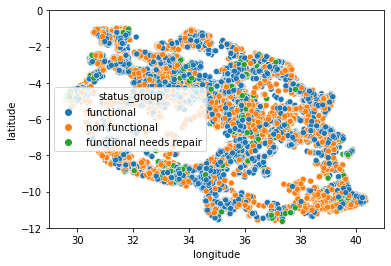

In [21]:
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['status_group']).set(xlim=(29,41), ylim=(-12, 0))

#cluster of non functional in bottom right corner

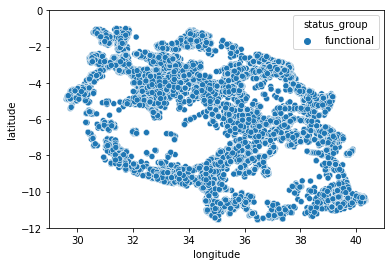

In [22]:
df_functional = df[df['status_group'] == 'functional']

sns.scatterplot(x=df_functional['longitude'], y=df_functional['latitude'], hue=df_functional['status_group']).set(
    xlim=(29,41), ylim=(-12, 0));

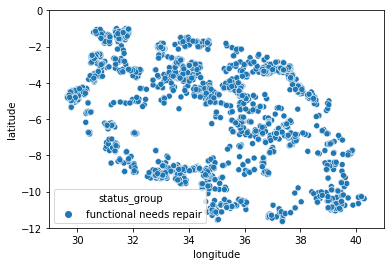

In [23]:
df_repair = df[df['status_group'] == 'functional needs repair']

sns.scatterplot(x=df_repair['longitude'], y=df_repair['latitude'], hue=df_repair['status_group']).set(
    xlim=(29,41), ylim=(-12, 0));

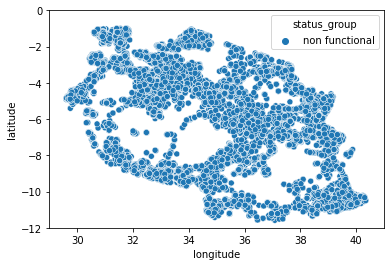

In [24]:
df_non = df[df['status_group'] == 'non functional']

sns.scatterplot(x=df_non['longitude'], y=df_non['latitude'], hue=df_non['status_group']).set(
    xlim=(29,41), ylim=(-12, 0));

In [25]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age_well,geographical_split
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,12.0,SW
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,3.0,NW
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,4.0,NE
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,27.0,SE
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011.0,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,14.0,NE
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,15.0,SE
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011.0,SW
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011.0,NE


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59327 entries, 0 to 59399
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59327 non-null  int64         
 1   amount_tsh             59327 non-null  float64       
 2   date_recorded          59327 non-null  datetime64[ns]
 3   funder                 55698 non-null  object        
 4   gps_height             59327 non-null  int64         
 5   installer              55678 non-null  object        
 6   longitude              59327 non-null  float64       
 7   latitude               59327 non-null  float64       
 8   wpt_name               59327 non-null  object        
 9   num_private            59327 non-null  int64         
 10  basin                  59327 non-null  object        
 11  subvillage             58956 non-null  object        
 12  region                 59327 non-null  object        
 13  r

# `status_group` Visualization

Let's look at our classes.

In [27]:
#counts for each class
df['status_group'].value_counts()

functional                 32216
non functional             22798
functional needs repair     4313
Name: status_group, dtype: int64

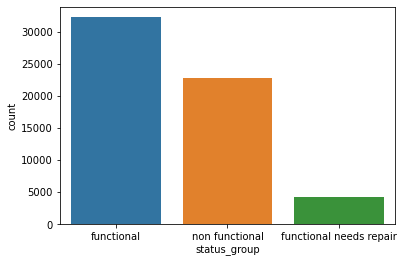

0.5430242553980481

0.3842769733847995

0.07269877121715239

In [28]:
#visualizing our counts
sns.countplot(x='status_group', data=df)
plt.show()

display(df['status_group'].value_counts()[0] / len(df['status_group']))
display(df['status_group'].value_counts()[1] / len(df['status_group']))
display(df['status_group'].value_counts()[2] / len(df['status_group']))

In [29]:
df.groupby('status_group').median()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,age_well
status_group,,,,,,,,,,,
functional,36873.5,0.0,550.0,34.969779,-4.905241,0.0,11.0,3.0,40.0,1995.0,18.0
functional needs repair,37180.0,0.0,383.0,33.826926,-4.656904,0.0,15.0,3.0,25.0,1978.0,33.0
non functional,37292.0,0.0,293.0,34.958383,-5.421011,0.0,13.0,3.0,1.0,1980.0,33.0


# Continuous Variables Exploration

### Construction Year variable

In [30]:
#replace 0s with NaN
df['construction_year'] = np.where(df['construction_year'] == 0, np.nan, df['construction_year'])
df['construction_year'].isnull().sum()

20689

In [31]:
#preview median
df.groupby('status_group').median()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,age_well
status_group,,,,,,,,,,,
functional,36873.5,0.0,550.0,34.969779,-4.905241,0.0,11.0,3.0,40.0,2003.0,18.0
functional needs repair,37180.0,0.0,383.0,33.826926,-4.656904,0.0,15.0,3.0,25.0,1998.0,33.0
non functional,37292.0,0.0,293.0,34.958383,-5.421011,0.0,13.0,3.0,1.0,1994.0,33.0


In [32]:
#previewing the data of the wells with a missing construction year
df[df['construction_year'].isnull()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age_well,geographical_split
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011.0,NW
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,2012.0,NW
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,2012.0,NW
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,2012.0,NW
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011.0,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,72148,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,0,...,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2011.0,NW
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2011.0,SW
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,insufficient,insufficient,dam,dam,surface,other,other,functional,2012.0,NW
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011.0,SW


In [33]:
#previewing the data of the wells with a missing construction year
df[df['construction_year'].isnull()][['amount_tsh', 'gps_height', 'population', 'construction_year']].describe()

,amount_tsh,gps_height,population,construction_year
count,20689.000000,20689.000000,20689.000000,0.0
mean,39.427928,44.173280,11.973803,NaN
std,1492.981282,257.321853,156.038846,NaN
min,0.000000,-90.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,NaN
max,200000.000000,2215.000000,6922.000000,NaN


In [34]:
#0s by status group
df[df['construction_year'].isnull()]['status_group'].value_counts()

functional                 10545
non functional              8355
functional needs repair     1789
Name: status_group, dtype: int64

In [35]:
#see value counts
display(df['construction_year'].value_counts().sort_index(ascending=False))
df.groupby('status_group')['construction_year'].median()

2013.0     176
2012.0    1082
2011.0    1254
2010.0    2642
2009.0    2527
2008.0    2611
2007.0    1586
2006.0    1467
2005.0    1008
2004.0    1120
2003.0    1286
2002.0    1074
2001.0     539
2000.0    2087
1999.0     978
1998.0     964
1997.0     643
1996.0     811
1995.0    1012
1994.0     737
1993.0     607
1992.0     638
1991.0     324
1990.0     954
1989.0     315
1988.0     520
1987.0     302
1986.0     434
1985.0     945
1984.0     779
1983.0     488
1982.0     743
1981.0     238
1980.0     810
1979.0     192
1978.0    1035
1977.0     201
1976.0     412
1975.0     437
1974.0     676
1973.0     184
1972.0     707
1971.0     145
1970.0     411
1969.0      59
1968.0      76
1967.0      88
1966.0      17
1965.0      19
1964.0      40
1963.0      85
1962.0      30
1961.0      21
1960.0     102
Name: construction_year, dtype: int64

status_group
functional                 2003.0
functional needs repair    1998.0
non functional             1994.0
Name: construction_year, dtype: float64

<AxesSubplot:>

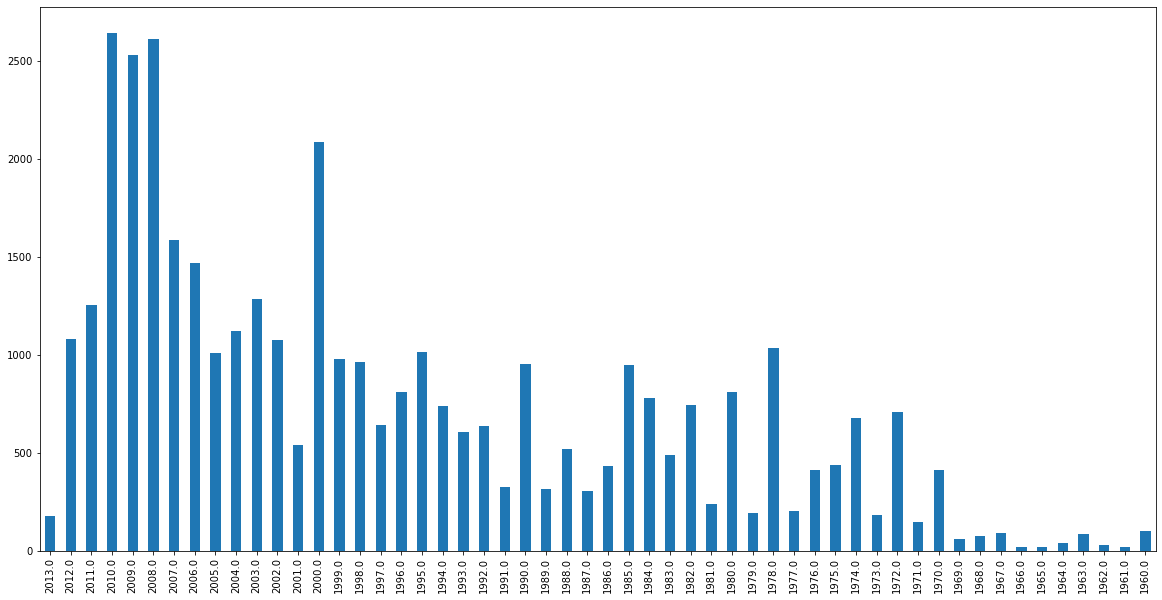

In [36]:
#plot a histogram for construction year
fig, ax = plt.subplots(figsize=(20,10))

df['construction_year'].value_counts().sort_index(ascending=False).plot(kind='bar')

### Population variable

In [37]:
#preview this column
df['population'].describe()

count    59327.000000
mean       179.901023
std        471.686504
min          0.000000
25%          0.000000
50%         25.000000
75%        214.000000
max      30500.000000
Name: population, dtype: float64

In [38]:
display(df['population'].value_counts())
#how to handle 0?

0       21360
1        7018
200      1937
150      1892
250      1677
        ...  
406         1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [39]:
#replace 0s with NaN
df['population'] = np.where(df['population'] == 0, np.nan, df['population'])
df['population'].isnull().sum()

21360

In [40]:
df.groupby('status_group')['population'].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,20953.0,288.406672,613.455897,1.0,45.0,150.0,315.0,30500.0
functional needs repair,2539.0,297.487594,531.453679,1.0,60.0,200.0,400.0,15300.0
non functional,14475.0,267.680967,492.659393,1.0,1.0,150.0,320.0,9865.0


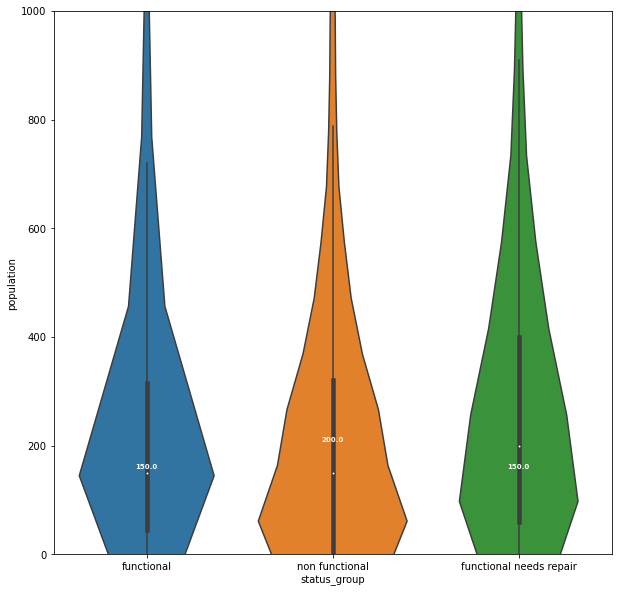

In [41]:
#visualize our population variable
fig, ax = plt.subplots(figsize=(10,10))

sns.violinplot(ax=ax, data=df, x='status_group', y='population').set(ylim=(0,1000))

medians = df.groupby(['status_group'])['population'].median().values
vertical_offset = df['population'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold');

Appears that population doesn't seem to differ between the status groups?

### GPS Height variable

In [42]:
df.groupby('status_group')['gps_height'].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32216.0,740.111901,724.266757,-90.0,0.0,550.0,1404.25,2628.0
functional needs repair,4313.0,626.762578,648.006847,-51.0,0.0,383.0,1242.00,2770.0
non functional,22798.0,574.572112,642.820109,-59.0,0.0,293.0,1211.00,2627.0


In [43]:
df['gps_height'].value_counts()
#how to handle 0s and negatives?

 0       20418
-15         60
-16         55
-13         55
-20         52
         ...  
 2424        1
 2552        1
 2413        1
 2614        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [44]:
#replace 0s with NaN
df['gps_height'] = np.where(df['gps_height'] == 0, np.nan, df['gps_height'])
df['gps_height'].isnull().sum()

20418

In [45]:
display(df.groupby('status_group')['gps_height'].describe())

df['gps_height'].value_counts()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,21758.0,1095.847275,621.977227,-90.0,503.0,1249.0,1570.00,2628.0
functional needs repair,2550.0,1060.089020,500.797549,-51.0,730.5,1159.0,1422.75,2770.0
non functional,14601.0,897.136840,596.497638,-59.0,321.0,997.0,1384.00,2627.0


-15.0      60
-16.0      55
-13.0      55
 1290.0    52
-20.0      52
           ..
 2285.0     1
 649.0      1
 2312.0     1
 2257.0     1
 2347.0     1
Name: gps_height, Length: 2427, dtype: int64

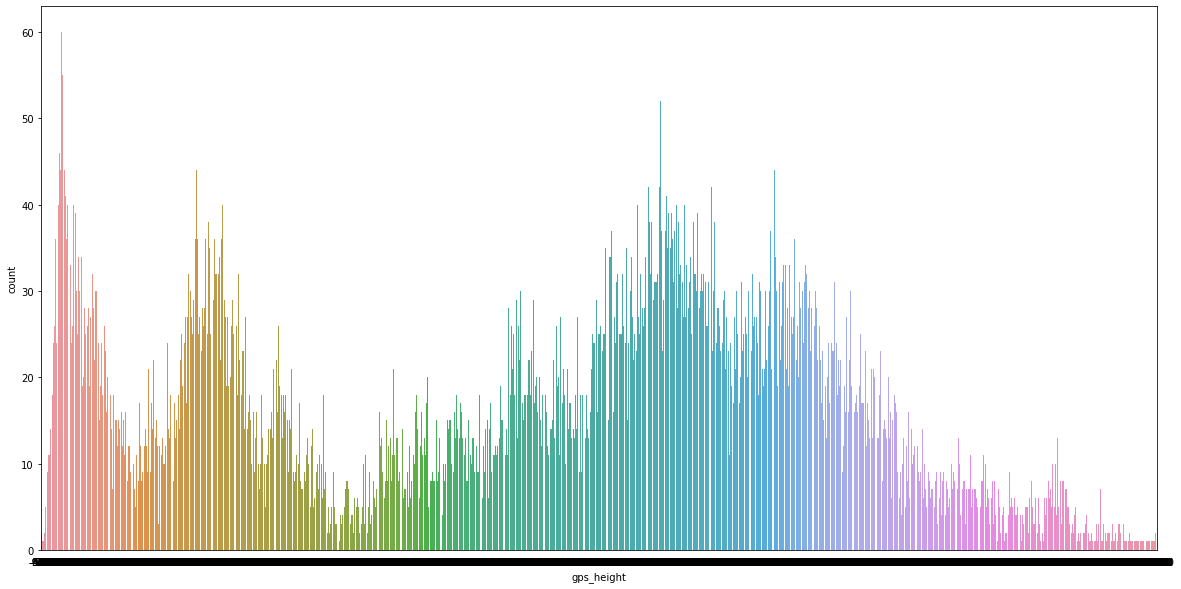

In [46]:
#visualize the height
fig, ax = plt.subplots(figsize=(20,10))

sns.countplot(x=df['gps_height'], data=df).tick_params(bottom=False)
#               order=df['gps_height'].value_counts().iloc[:25].index)

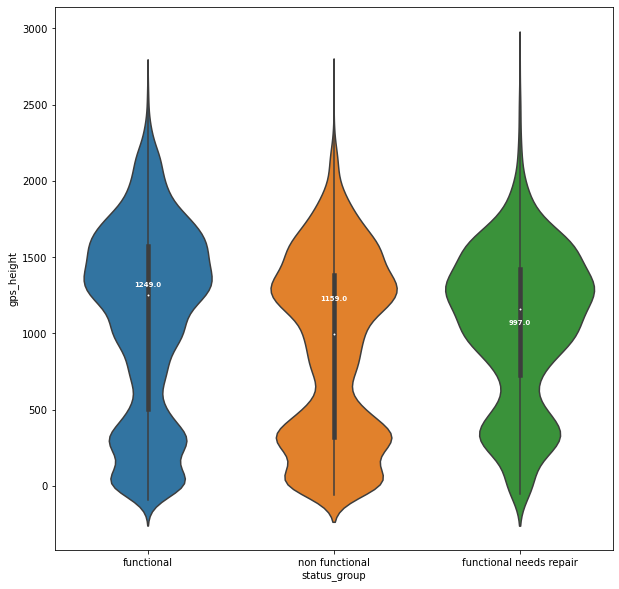

In [47]:
#another visualization of gps_height
fig, ax = plt.subplots(figsize=(10,10))

sns.violinplot(ax=ax, data=df, x='status_group', y='gps_height')

medians = df.groupby(['status_group'])['gps_height'].median().values
vertical_offset = df['gps_height'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold');

### Amount_tsh Variable

In [48]:
df.groupby('status_group')['amount_tsh'].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32216.0,461.524685,3891.599852,0.0,0.0,0.0,50.0,350000.0
functional needs repair,4313.0,266.855553,1925.725371,0.0,0.0,0.0,50.0,100000.0
non functional,22798.0,123.604509,1110.746862,0.0,0.0,0.0,0.0,117000.0


In [49]:
#are there any nulls?
df['amount_tsh'].isnull().sum()

0

In [50]:
df['amount_tsh'].value_counts()

0.0         41594
500.0        3100
50.0         2468
1000.0       1487
20.0         1462
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

What should we do with the 41.5K records with 0s? Are they truly 0s? Or are they placeholders for missing data?

In [51]:
df['amount_tsh'] = np.where(df['amount_tsh'] == 0, np.nan, df['amount_tsh'])
df['amount_tsh'].isnull().sum()

41594

In [52]:
df.groupby('status_group')['amount_tsh'].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,12531.0,1186.535731,6170.637210,0.25,50.0,250.0,1000.0,350000.0
functional needs repair,1268.0,907.687697,3469.694575,6.00,100.0,300.0,600.0,100000.0
non functional,3934.0,716.302898,2593.573427,0.20,50.0,200.0,500.0,117000.0


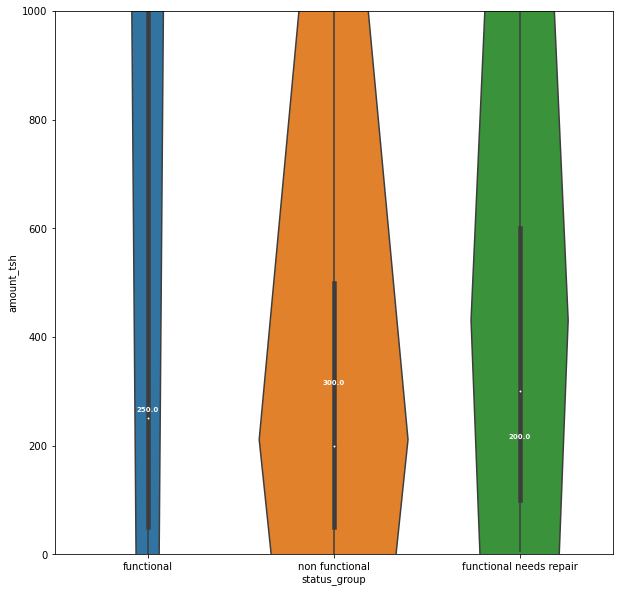

In [53]:
#visualize results
fig, ax = plt.subplots(figsize=(10,10))

sns.violinplot(ax=ax, data=df, x='status_group', y='amount_tsh').set(ylim=(0,1000))

medians = df.groupby(['status_group'])['amount_tsh'].median().values
vertical_offset = df['amount_tsh'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold');

We decided to ultimately drop this category because 41k records (66%) are missing and it's hard to tell if this was purposeful or  not.

# Data Visualization

Now that we've narrowed the columns down, let's preview how these look by `status_group`.

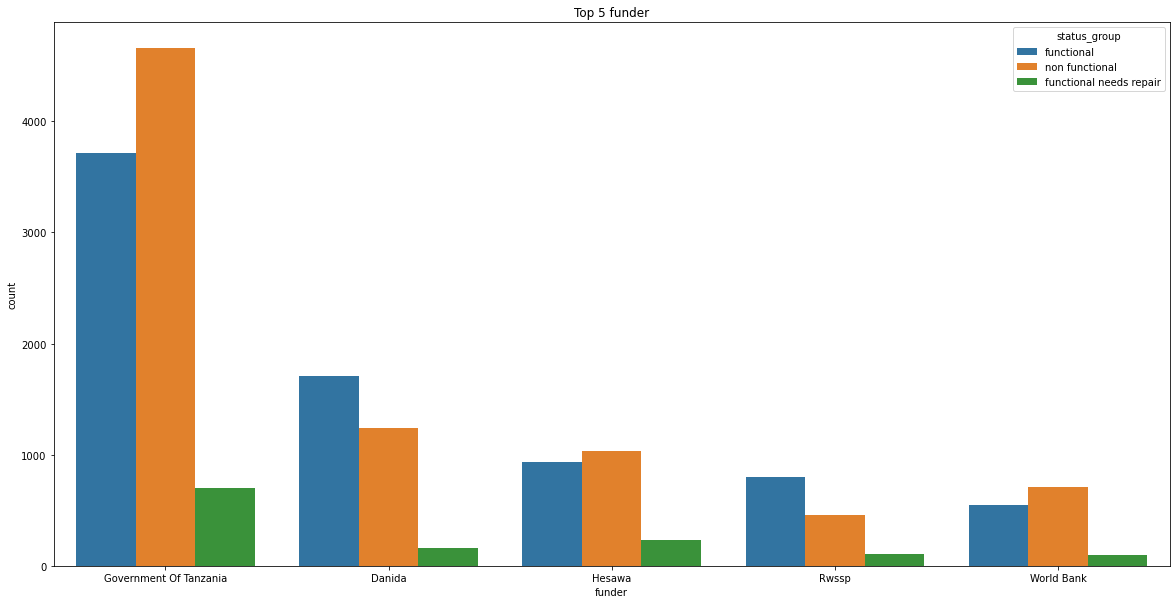

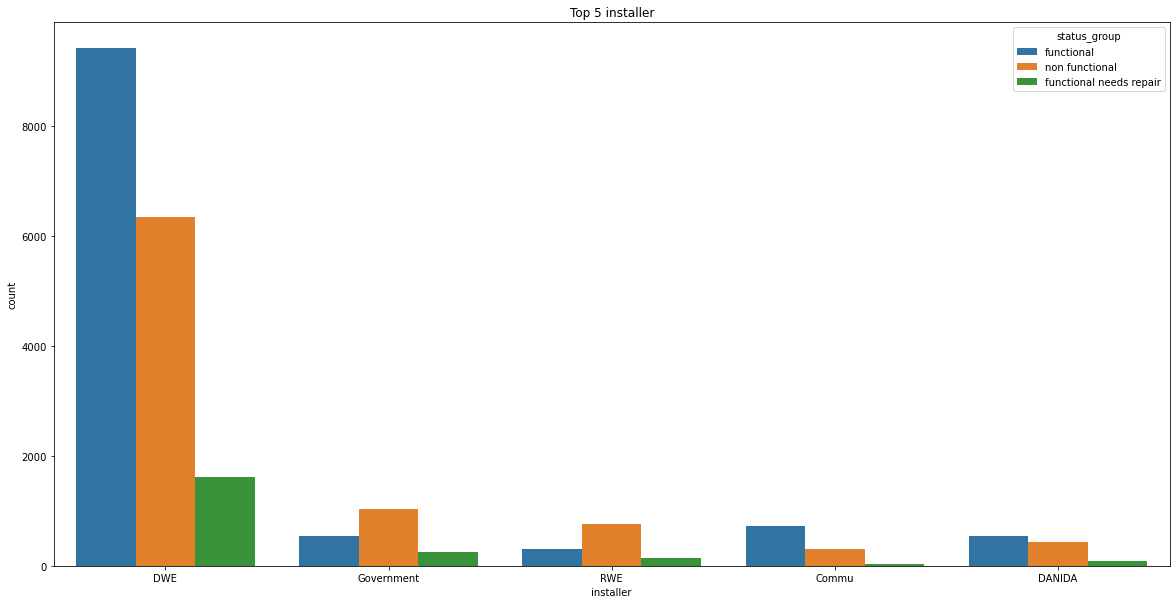

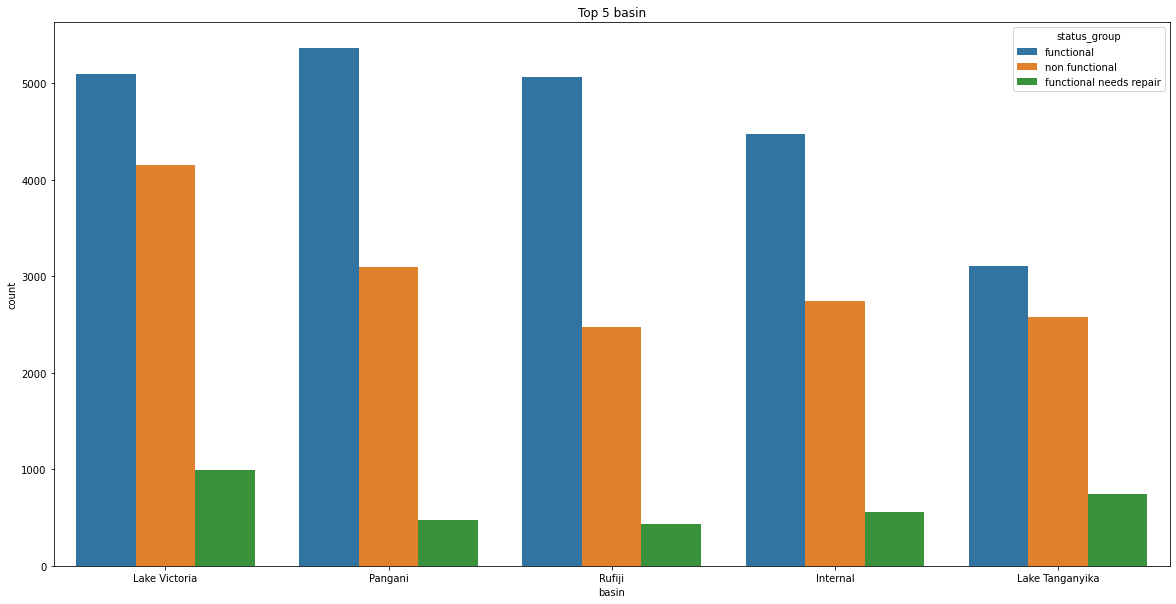

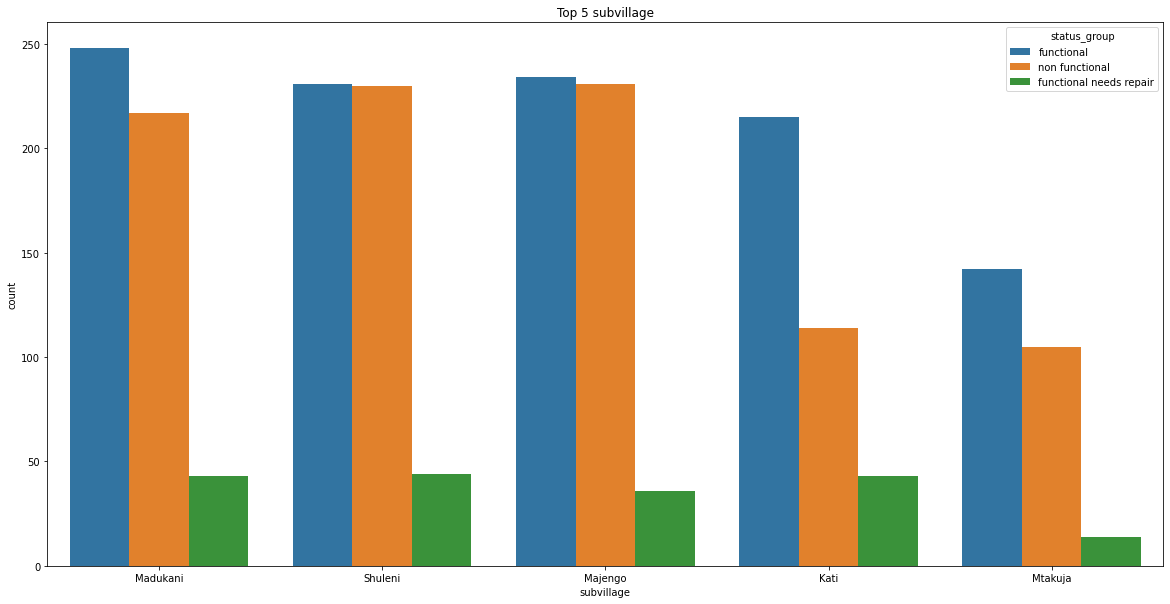

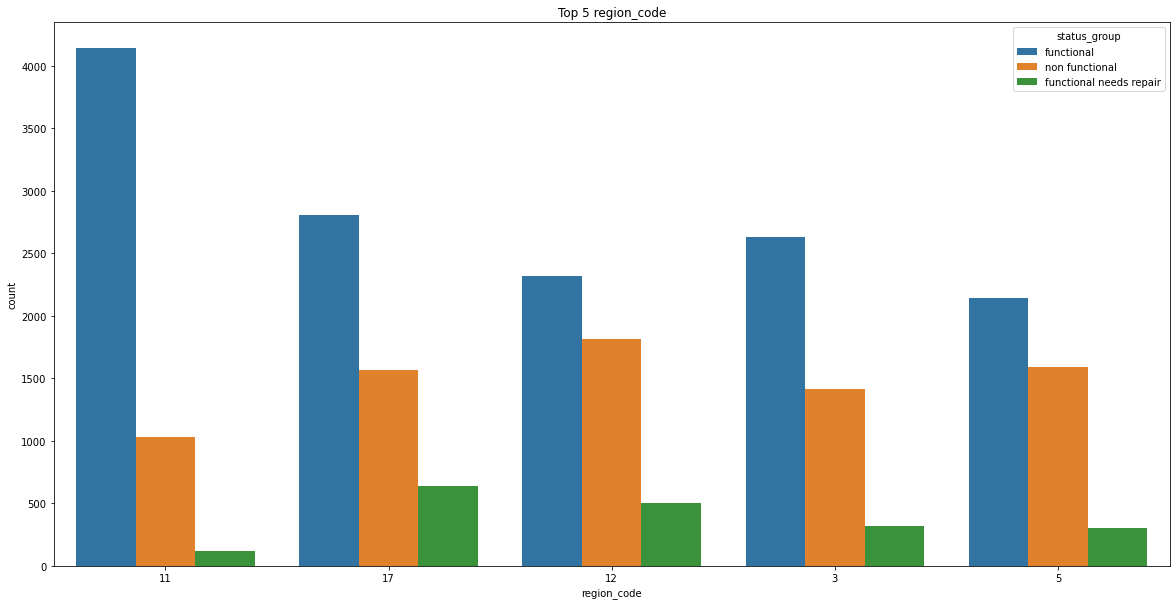

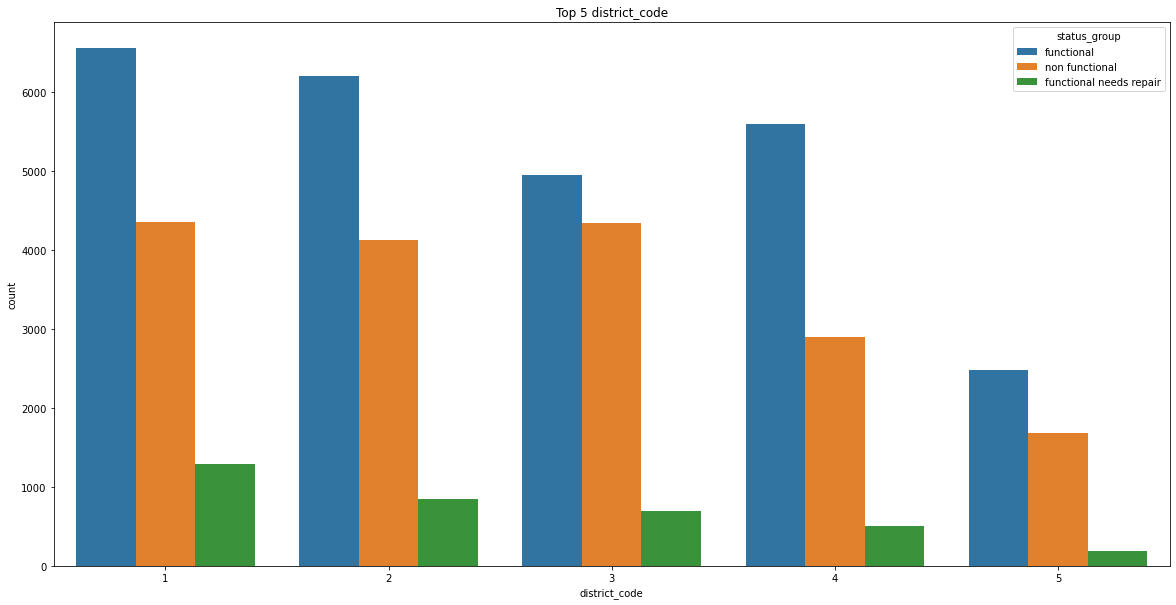

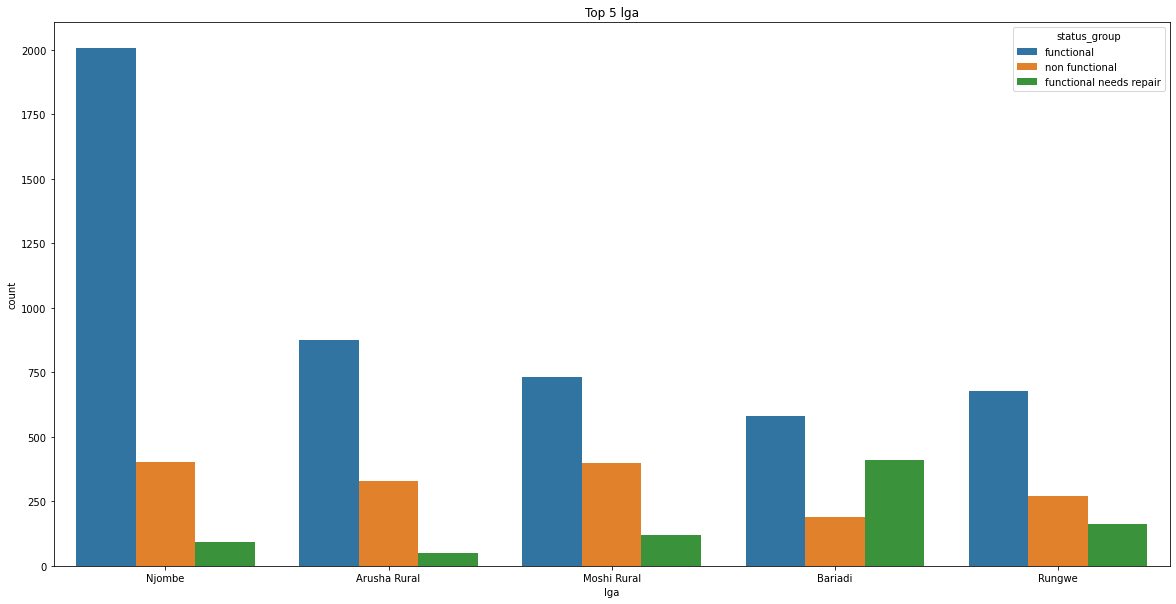

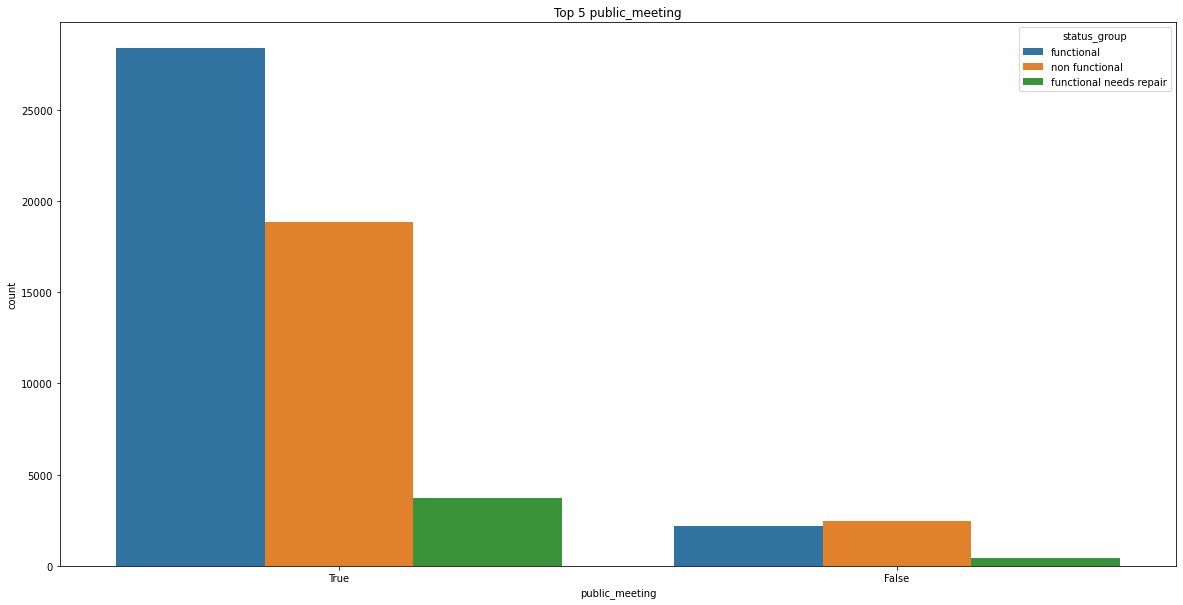

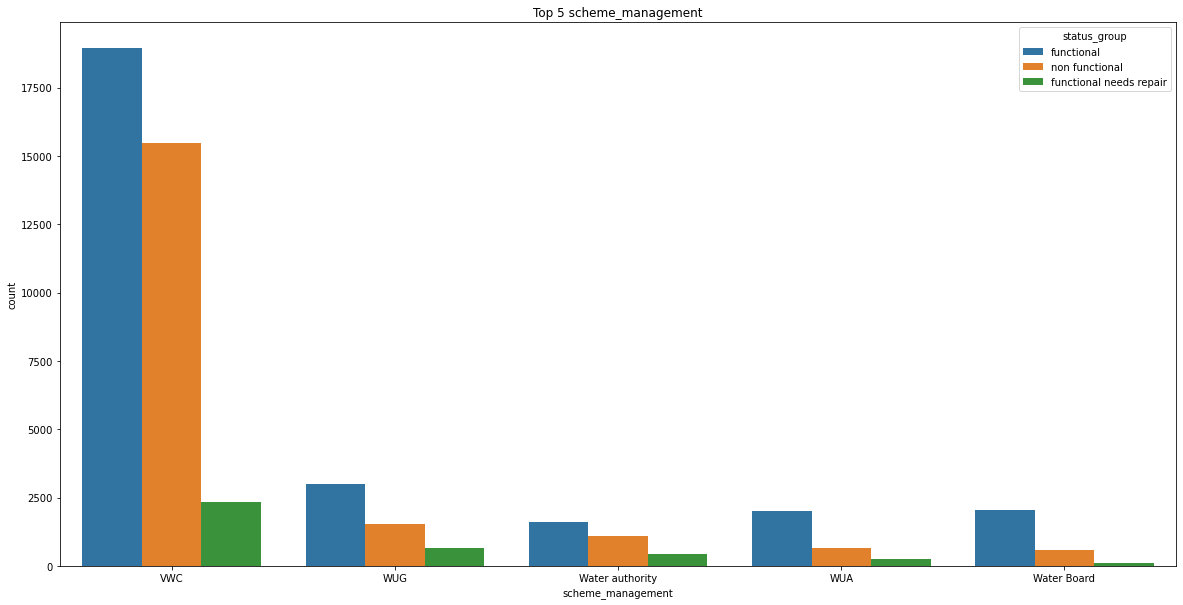

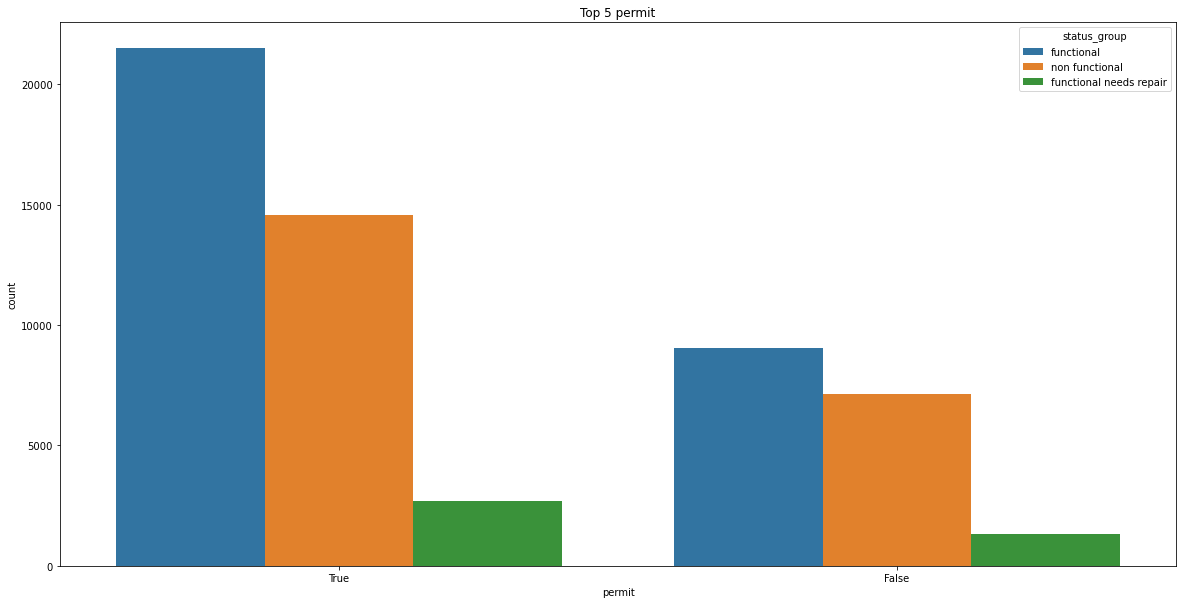

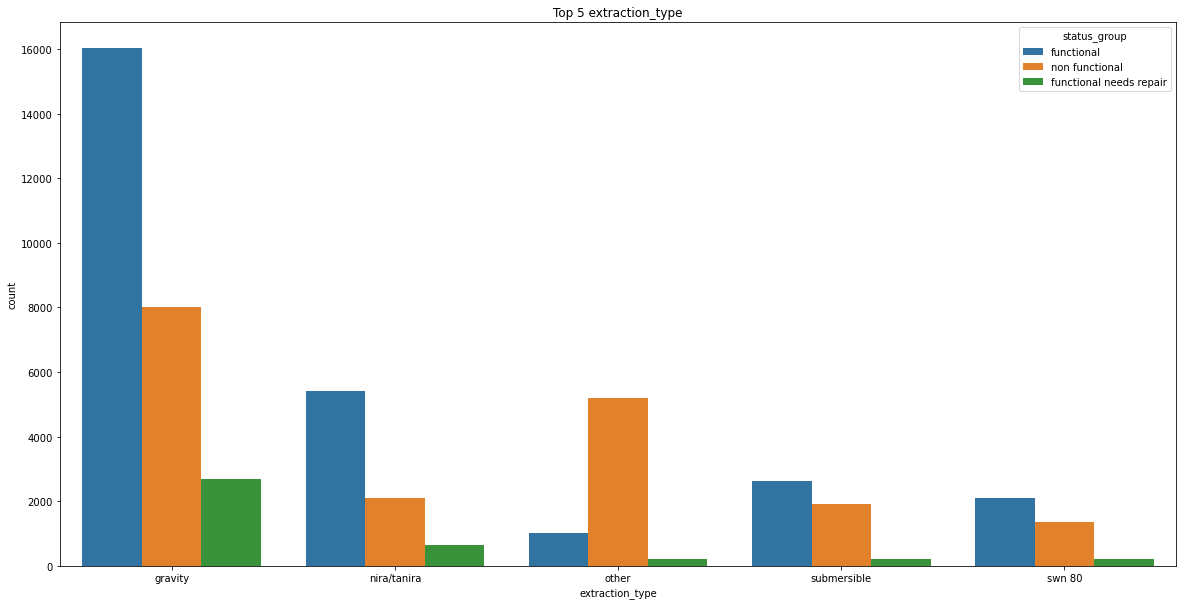

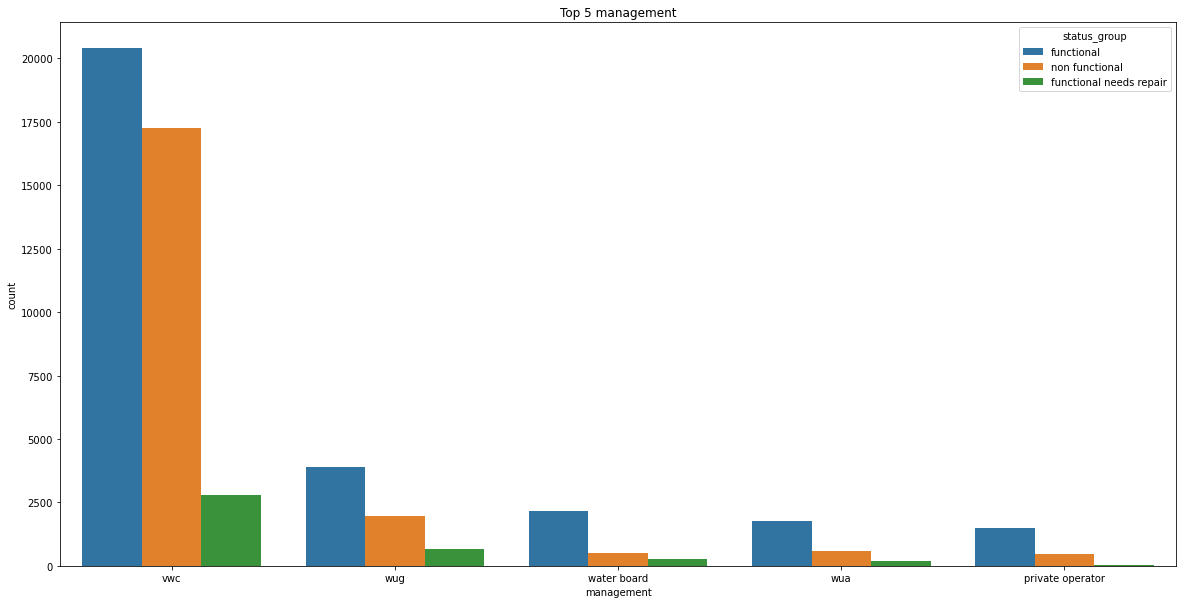

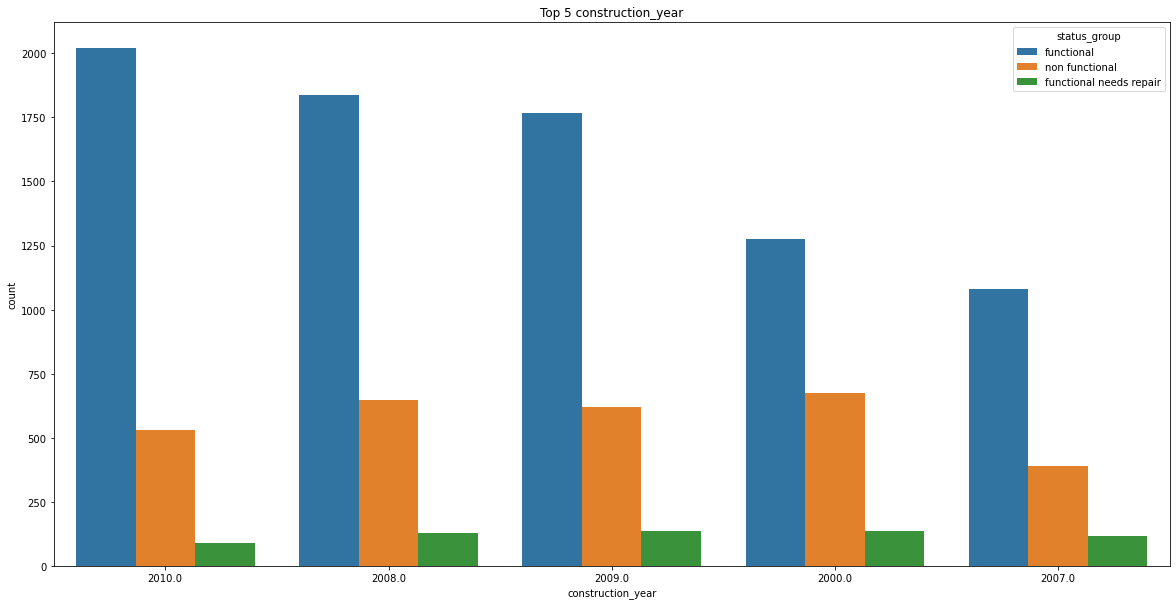

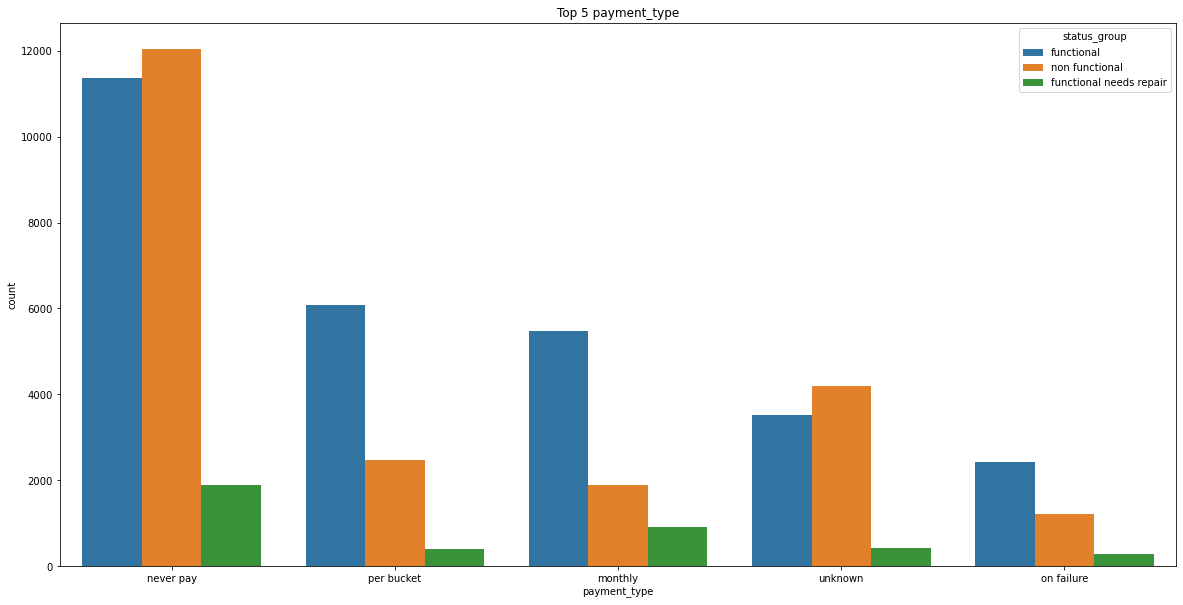

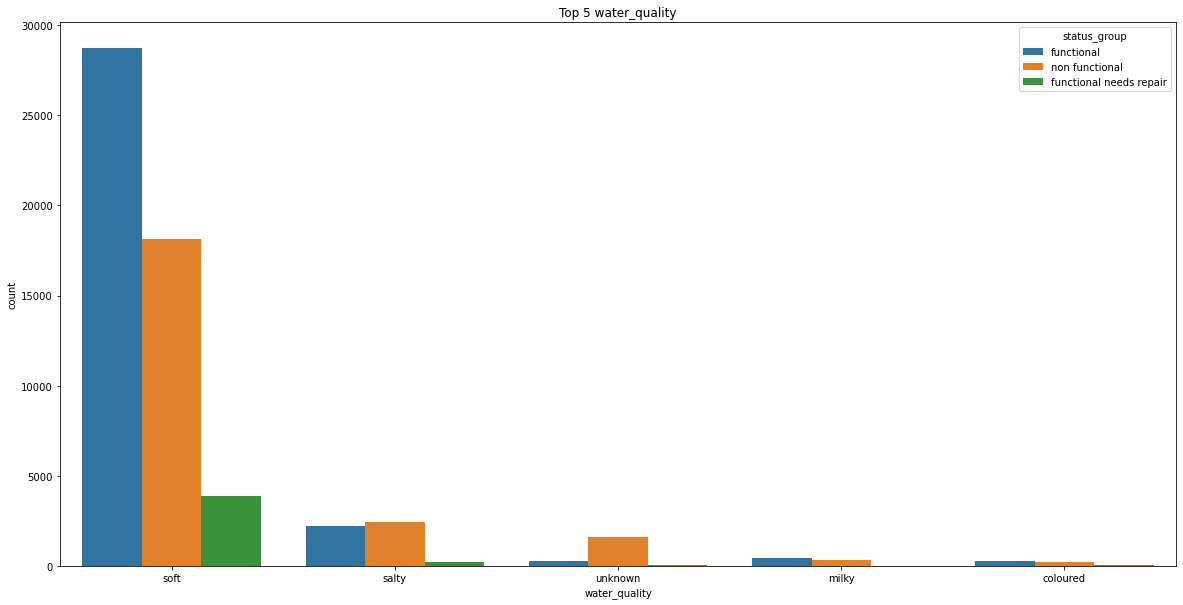

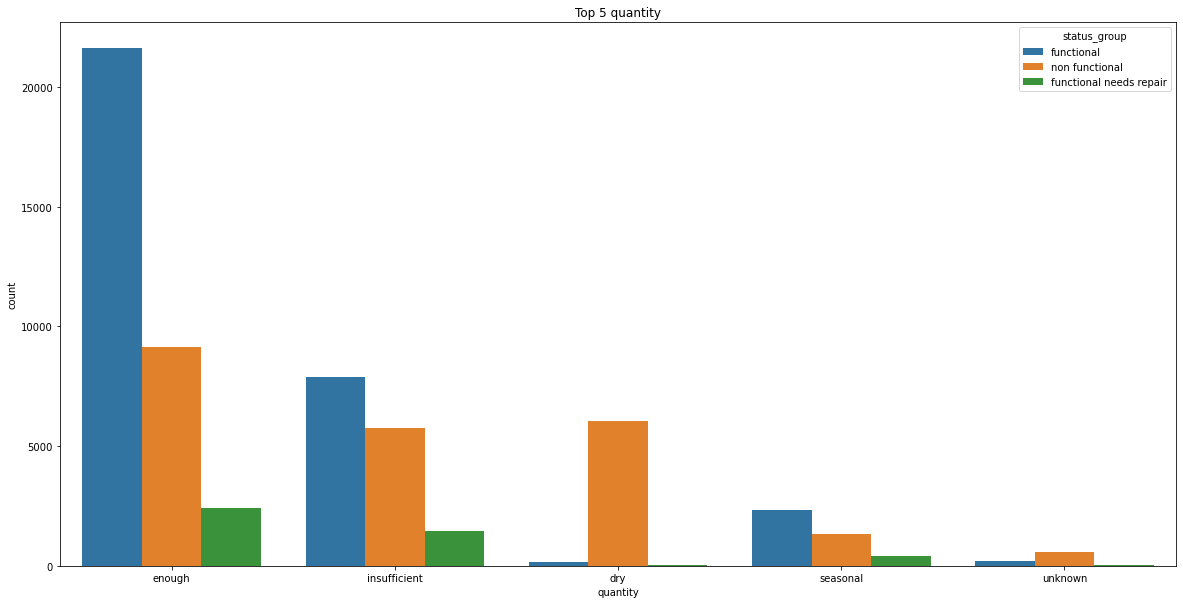

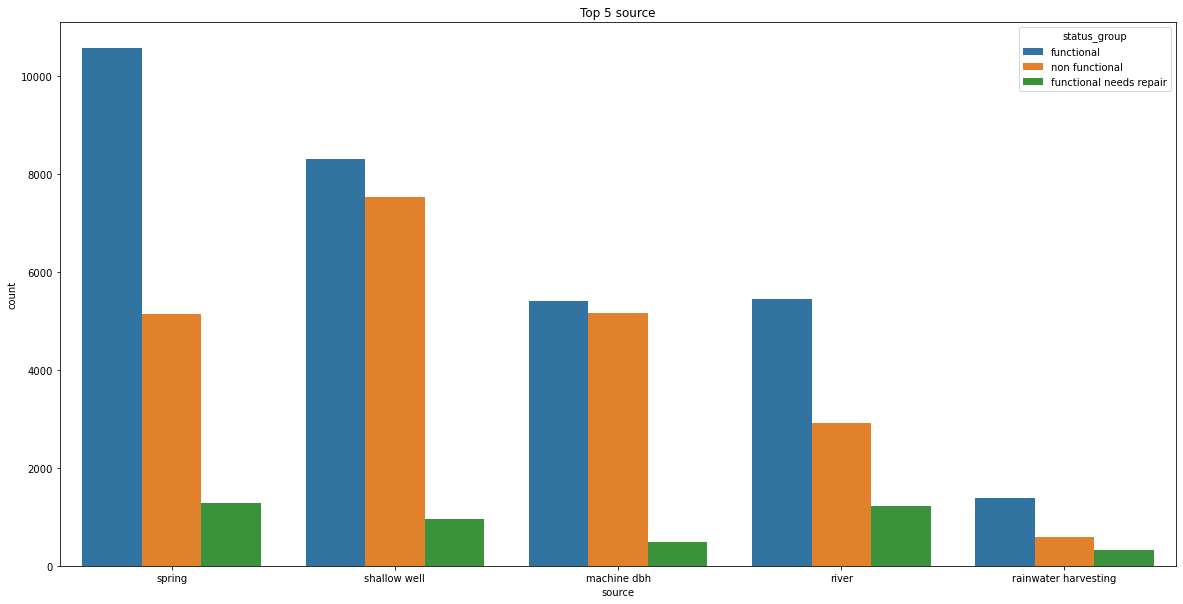

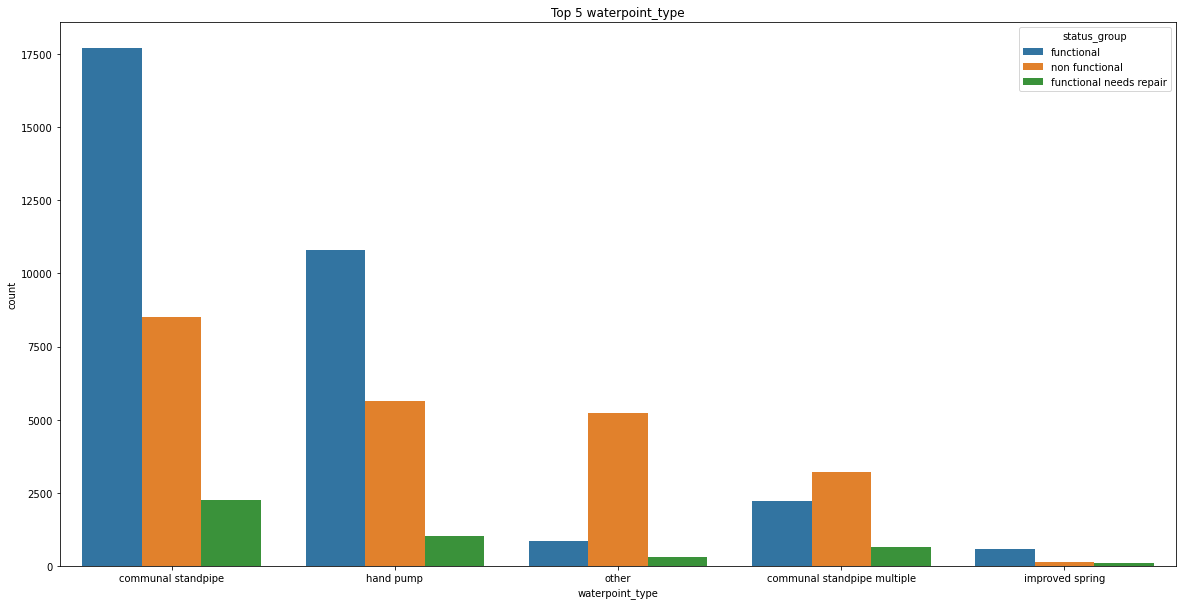

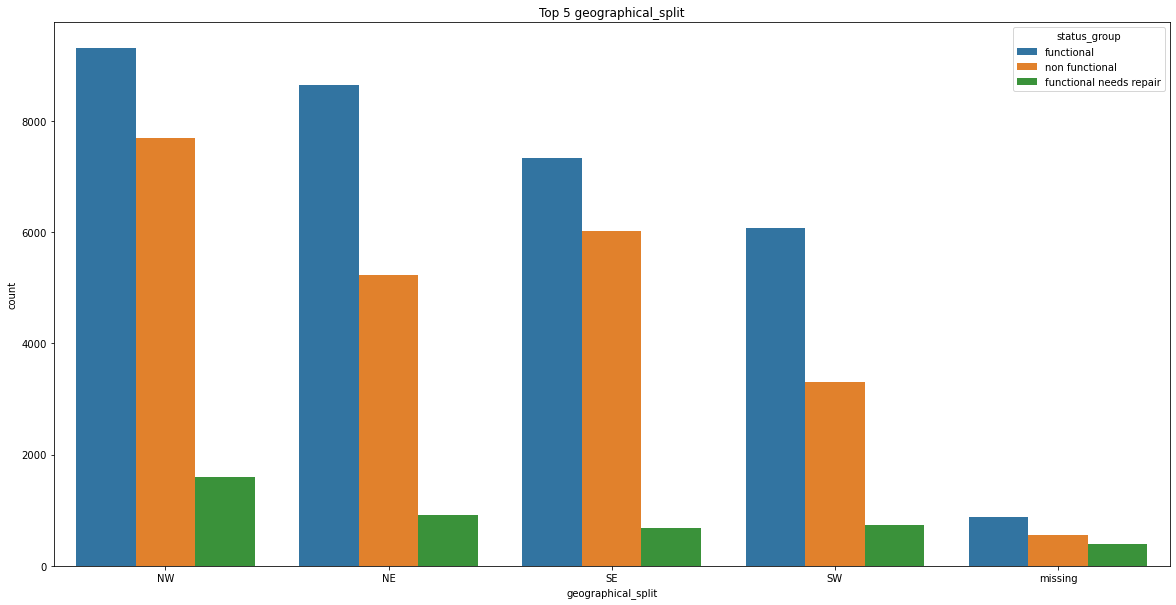

In [56]:
categorical = ['funder', 'installer', 'basin', 'subvillage', 'region_code', 'district_code', 'lga','public_meeting', 
               'scheme_management', 'permit', 'extraction_type', 'management','construction_year', 'payment_type', 
               'water_quality','quantity', 'source', 'waterpoint_type', 'geographical_split']

for cat in categorical:
    fig, ax = plt.subplots(figsize=(20,10))

    sns.countplot(ax=ax, data=df, x=cat, hue='status_group', order=df[cat].value_counts().iloc[:5].index)
    plt.title('Top 5 ' + cat);

<AxesSubplot:xlabel='construction_year', ylabel='count'>

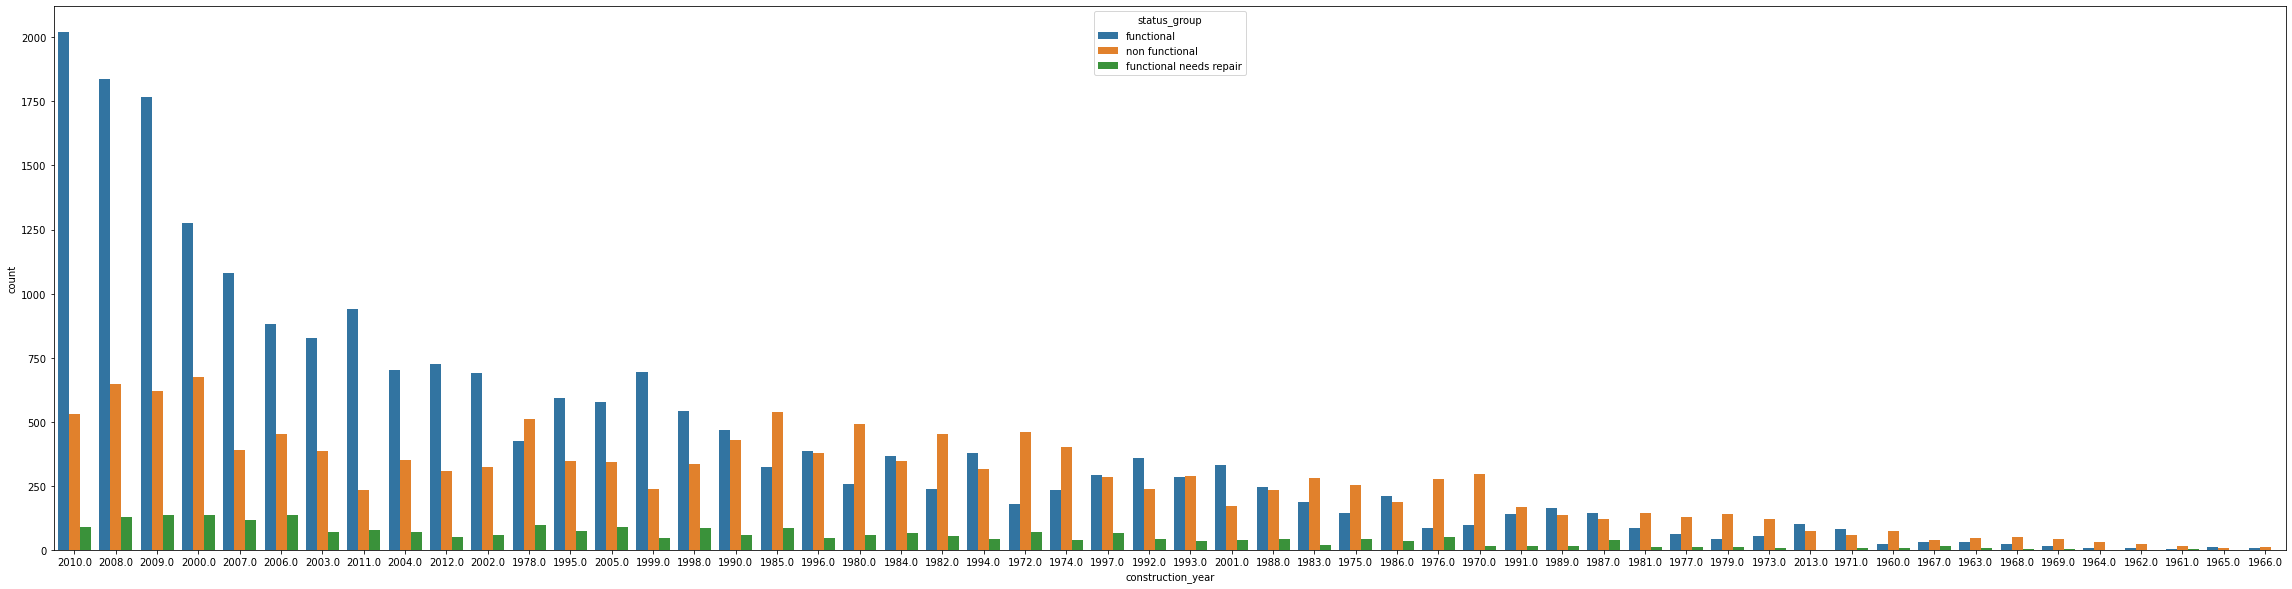

In [57]:
fig, ax = plt.subplots(figsize=(40,10))

sns.countplot(ax=ax, data=df, x='construction_year', hue='status_group', order=df['construction_year'].value_counts().iloc[:].index)


In [58]:
df['construction_year'].value_counts().sort_index()

1960.0     102
1961.0      21
1962.0      30
1963.0      85
1964.0      40
1965.0      19
1966.0      17
1967.0      88
1968.0      76
1969.0      59
1970.0     411
1971.0     145
1972.0     707
1973.0     184
1974.0     676
1975.0     437
1976.0     412
1977.0     201
1978.0    1035
1979.0     192
1980.0     810
1981.0     238
1982.0     743
1983.0     488
1984.0     779
1985.0     945
1986.0     434
1987.0     302
1988.0     520
1989.0     315
1990.0     954
1991.0     324
1992.0     638
1993.0     607
1994.0     737
1995.0    1012
1996.0     811
1997.0     643
1998.0     964
1999.0     978
2000.0    2087
2001.0     539
2002.0    1074
2003.0    1286
2004.0    1120
2005.0    1008
2006.0    1467
2007.0    1586
2008.0    2611
2009.0    2527
2010.0    2642
2011.0    1254
2012.0    1082
2013.0     176
Name: construction_year, dtype: int64

In [59]:
#because the construction_year graph is too busy, let's make ranges for the years
conditions=[df['construction_year'] < 1965, df['construction_year'] < 1970, df['construction_year'] < 1975, 
            df['construction_year'] < 1980, df['construction_year'] < 1985, df['construction_year'] < 1990,
            df['construction_year'] < 1995, df['construction_year'] < 2000, df['construction_year'] < 2005,
            df['construction_year'] < 2010, df['construction_year'] < 2015]

choices=['1960-1964', '1965-1969', '1970-1974', '1975-1979', '1980-1984', '1985-1989','1990-1994', '1995-1999',
        '2000-2004', '2005-2009','2010-2013']

df['construction_year_range'] = np.select(conditions, choices, default=np.nan)

In [60]:
df['construction_year_range'].value_counts()

nan          20689
2005-2009     9199
2000-2004     6106
2010-2013     5154
1995-1999     4408
1990-1994     3260
1980-1984     3058
1985-1989     2516
1975-1979     2277
1970-1974     2123
1960-1964      278
1965-1969      259
Name: construction_year_range, dtype: int64

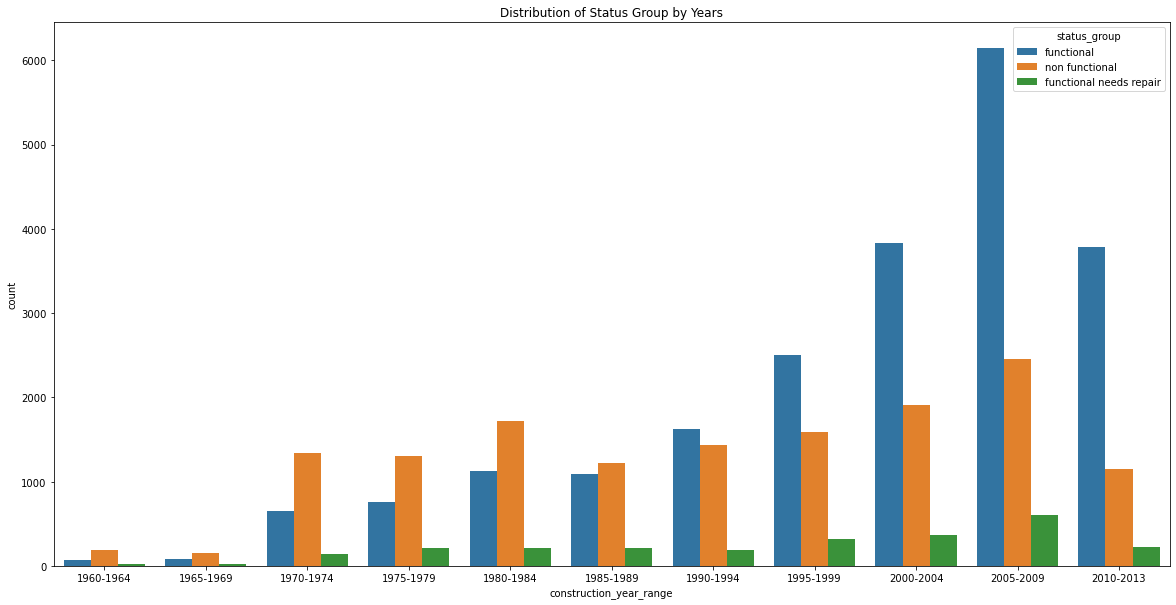

In [61]:
#visualizing the ranges of the construction years
fig, ax = plt.subplots(figsize=(20,10))

sns.countplot(ax=ax, data=df, x='construction_year_range', hue='status_group', order=choices)

plt.title('Distribution of Status Group by Years');

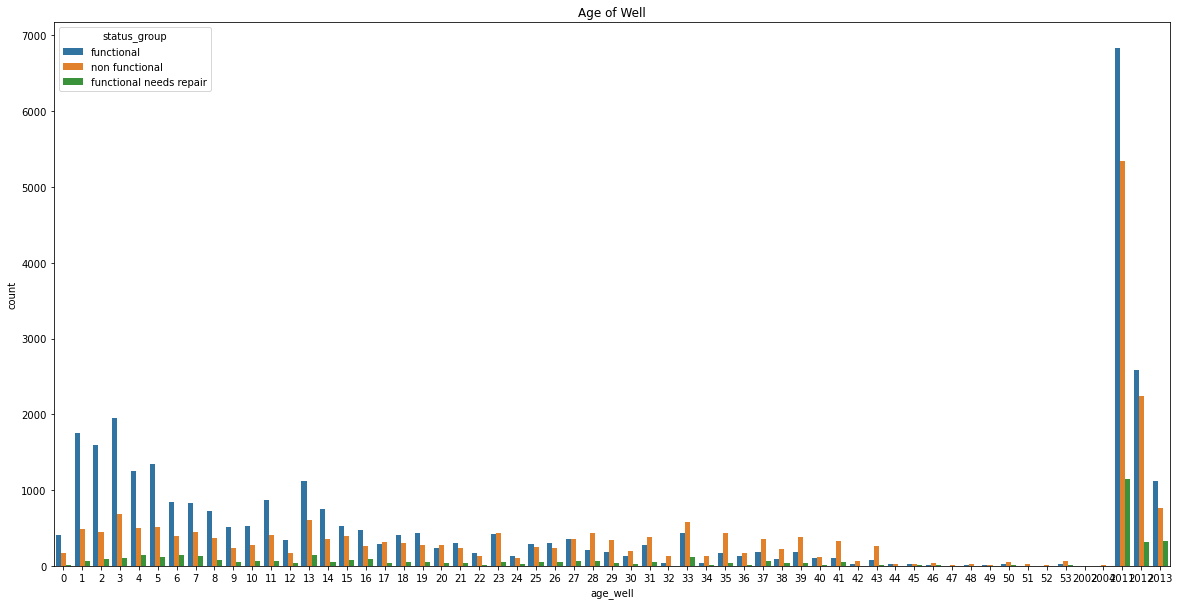

In [62]:
#visualizing the age of the wells
fig, ax = plt.subplots(figsize=(20,10))

sns.countplot(ax=ax, data=df, x='age_well', hue='status_group')
ax.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])

plt.title('Age of Well');

# Finalizing columns to look at

In [63]:
#new dataframe to preserve work
df_MAIN = df
df_MAIN

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age_well,geographical_split,construction_year_range
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,12.0,SW,1995-1999
1,8776,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,3.0,NW,2010-2013
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,4.0,NE,2005-2009
3,67743,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,27.0,SE,1985-1989
4,19728,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011.0,NW,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,14.0,NE,1995-1999
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,15.0,SE,1995-1999
59397,37057,NaN,2011-04-11,NaN,NaN,NaN,34.017087,-8.750434,Mashine,0,...,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011.0,SW,nan
59398,31282,NaN,2011-03-08,Malec,NaN,Musa,35.861315,-6.378573,Mshoro,0,...,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011.0,NE,nan


Columns that we know we can drop automatically:

In [3]:
#id - This is just the id of the well and won't affect the outcome
#date_recorded - this is useful for determining the age of the well but not for the model
#longitude & latitude - useful for finding duplicates but not for the model
#wpt_name - name of waterpoint, not relevant
#amount_tsh - amount of water in the well at the time of recording, too specific for relevancy
#num_private - lots of missing data and there's no explanation for what this column is anywhere
#region - we already have other columns for geographical info, we don't want more
#recorded_by - who recorded the data, not relevant
#scheme_name - very similar to scheme_management but just broader so we can drop this
#payment - very similar to payment_type but just broader so we can drop this
#quality_group & quantity_group - very similar to quantity but broader so we can drop these two
#source_type & source_class - very similar to source but broader so we can drop these two
#waterpoint_type_group - very similar to waterpoint_type but just broader so we can drop this
#extraction_type_class & extraction_type_group - very similar to sextraction_type but broader so we can drop these two
#management_group - very similar to management but broader so we can drop this
#ward - geographical but we already have columns for geographical data, including this is overkill
#construction_year_range - was useful for visualizations but not needed for the model, we already have well age

In [64]:
#trimming down our dataframe for modeling.
df_MAIN = df.drop(['id', 'date_recorded', 'longitude', 'latitude', 'wpt_name', 'amount_tsh', 'num_private', 'region',
                   'recorded_by', 'scheme_name', 'payment', 'quality_group', 'quantity_group','source_type', 
                   'source_class', 'waterpoint_type_group','extraction_type_group', 'extraction_type_class', 
                   'management_group','ward', 'construction_year_range'], axis = 1)

continuous = ['gps_height', 'population', 'age_of_well']

target = ['status_group']

In [65]:
#display unique category counts for each variable
categorical = ['funder', 'installer', 'basin', 'subvillage', 'region_code', 'district_code', 'lga','public_meeting', 
               'scheme_management', 'permit', 'extraction_type', 'management','construction_year', 'payment_type', 
               'water_quality','quantity', 'source', 'waterpoint_type', 'geographical_split']

for cat in categorical:
    print(cat, df_MAIN[cat].nunique())

funder 1896
installer 2144
basin 9
subvillage 19271
region_code 27
district_code 20
lga 125
public_meeting 2
scheme_management 12
permit 2
extraction_type 18
management 12
construction_year 54
payment_type 7
water_quality 8
quantity 5
source 10
waterpoint_type 7
geographical_split 5


In [66]:
#let's isolate the categories with over 1000 unique values
categorical_numerous = []

for cat in categorical:
    if df_MAIN[cat].nunique() >= 1000:
        categorical_numerous.append(cat)
    else:
        continue
        
categorical_numerous

['funder', 'installer', 'subvillage']

In [67]:
#select top 20 categories to OHE for categories with over 1000 unique values
for cat_num in categorical_numerous:
    top_cats = [cat_num + '_' + cat for cat in df_MAIN[cat_num].value_counts().sort_values(ascending = False).head(20).index]
    for cat in top_cats:
        df_MAIN[cat] = np.where(df_MAIN[cat_num] == cat, 1, 0) # whenever a top 20 cat, replace it with 1 else 0

df_MAIN

,amount_tsh,funder,gps_height,installer,basin,subvillage,region_code,district_code,lga,population,...,subvillage_Songambele,subvillage_Miembeni,subvillage_Msikitini,subvillage_1,subvillage_Kibaoni,subvillage_Kanisani,subvillage_I,subvillage_Mapinduzi,subvillage_Mjini,subvillage_Mjimwema
0,6000.0,Roman,1390.0,Roman,Lake Nyasa,Mnyusi B,11,5,Ludewa,109.0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Grumeti,1399.0,GRUMETI,Lake Victoria,Nyamara,20,2,Serengeti,280.0,...,0,0,0,0,0,0,0,0,0,0
2,25.0,Lottery Club,686.0,World vision,Pangani,Majengo,21,4,Simanjiro,250.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Unicef,263.0,UNICEF,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,58.0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Action In A,NaN,Artisan,Lake Victoria,Kyanyamisa,18,1,Karagwe,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Germany Republi,1210.0,CES,Pangani,Kiduruni,3,5,Hai,125.0,...,0,0,0,0,0,0,0,0,0,0
59396,4700.0,Cefa-njombe,1212.0,Cefa,Rufiji,Igumbilo,11,4,Njombe,56.0,...,0,0,0,0,0,0,0,0,0,0
59397,NaN,NaN,NaN,NaN,Rufiji,Madungulu,12,7,Mbarali,NaN,...,0,0,0,0,0,0,0,0,0,0
59398,NaN,Malec,NaN,Musa,Rufiji,Mwinyi,1,4,Chamwino,NaN,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#finalize our dataframe for modeling
df_MAIN = df.drop(['id', 'date_recorded', 'longitude', 'latitude', 'wpt_name', 'num_private', 'region','recorded_by',
                  'scheme_name', 'payment', 'quality_group', 'quantity_group','source_type', 'source_class', 
                  'waterpoint_type_group', 'extraction_type_group', 'extraction_type_class', 
                  'management_group','ward', 'funder', 'installer', 'subvillage', 'amount_tsh', 'construction_year_range'], 
                  axis = 1)
df_MAIN

,gps_height,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,age_well,geographical_split
0,1390.0,Lake Nyasa,11,5,Ludewa,109.0,True,VWC,False,1999.0,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional,12.0,SW
1,1399.0,Lake Victoria,20,2,Serengeti,280.0,NaN,Other,True,2010.0,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3.0,NW
2,686.0,Pangani,21,4,Simanjiro,250.0,True,VWC,True,2009.0,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,functional,4.0,NE
3,263.0,Ruvuma / Southern Coast,90,63,Nanyumbu,58.0,True,VWC,True,1986.0,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27.0,SE
4,NaN,Lake Victoria,18,1,Karagwe,NaN,True,NaN,True,NaN,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,2011.0,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1210.0,Pangani,3,5,Hai,125.0,True,Water Board,True,1999.0,gravity,water board,per bucket,soft,enough,spring,communal standpipe,functional,14.0,NE
59396,1212.0,Rufiji,11,4,Njombe,56.0,True,VWC,True,1996.0,gravity,vwc,annually,soft,enough,river,communal standpipe,functional,15.0,SE
59397,NaN,Rufiji,12,7,Mbarali,NaN,True,VWC,False,NaN,swn 80,vwc,monthly,fluoride,enough,machine dbh,hand pump,functional,2011.0,SW
59398,NaN,Rufiji,1,4,Chamwino,NaN,True,VWC,True,NaN,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,2011.0,NE


Imputing the NaNs earlier.

In [69]:
from sklearn.impute import KNNImputer

new_data = {0: np.nan}

df_MAIN = df_MAIN.replace({'construction_year':new_data})
df_MAIN = df_MAIN.replace({'population':new_data})
df_MAIN = df_MAIN.replace({'gps_height':new_data})
df_MAIN = df_MAIN.replace({'age_well':new_data})

imputer_year = KNNImputer(n_neighbors=5, weights='distance')
imputer_pop = KNNImputer(n_neighbors=5, weights='distance')
imputer_gps = KNNImputer(n_neighbors=5, weights='distance')
imputer_age = KNNImputer(n_neighbors=5, weights='distance')

df_year = imputer_year.fit_transform(df_MAIN['construction_year'].values.reshape(-1, 1))
df_pop = imputer_pop.fit_transform(df_MAIN['population'].values.reshape(-1, 1))
df_gps = imputer_gps.fit_transform(df_MAIN['gps_height'].values.reshape(-1, 1))
df_age = imputer_gps.fit_transform(df_MAIN['age_well'].values.reshape(-1, 1))

df_MAIN['construction_year'] = df_year
df_MAIN['population'] = df_pop
df_MAIN['gps_height'] = df_gps
df_MAIN['age_well'] = df_age

In [70]:
#describe data after imputing
df_MAIN.describe()

,gps_height,region_code,district_code,population,construction_year,age_well
count,59327.000000,59327.000000,59327.000000,59327.000000,59327.000000,59327.000000
mean,1018.935645,15.295228,5.627370,281.112229,1996.812283,718.662177
std,496.091865,17.585787,9.627139,451.973286,10.065656,948.638497
min,-90.000000,1.000000,0.000000,1.000000,1960.000000,1.000000
25%,903.000000,5.000000,2.000000,100.000000,1996.000000,8.000000
50%,1018.935645,12.000000,3.000000,281.112229,1996.812283,27.000000
75%,1320.000000,17.000000,5.000000,281.112229,2004.000000,2011.000000
max,2770.000000,99.000000,80.000000,30500.000000,2013.000000,2013.000000


Let's do another check for nulls.

In [71]:
df_MAIN.isnull().sum()[:20]

gps_height               0
basin                    0
region_code              0
district_code            0
lga                      0
population               0
public_meeting        3328
scheme_management     3872
permit                3051
construction_year        0
extraction_type          0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
age_well                 0
geographical_split       0
dtype: int64

In [72]:
#covert the nulls with class: "missing"
df_MAIN['public_meeting'] = df_MAIN['public_meeting'].replace(np.nan, 'missing')
df_MAIN['scheme_management'] = df_MAIN['scheme_management'].replace(np.nan, 'missing')
df_MAIN['permit'] = df_MAIN['permit'].replace(np.nan, 'missing')

In [73]:
#confirm we handled the nulls
df_MAIN.isnull().sum()[:20]

gps_height            0
basin                 0
region_code           0
district_code         0
lga                   0
population            0
public_meeting        0
scheme_management     0
permit                0
construction_year     0
extraction_type       0
management            0
payment_type          0
water_quality         0
quantity              0
source                0
waterpoint_type       0
status_group          0
age_well              0
geographical_split    0
dtype: int64

Let's convert our boolean values into strings for modeling.

In [74]:
df_MAIN['public_meeting'] = df_MAIN['public_meeting'].replace(True, 'True')
df_MAIN['public_meeting'] = df_MAIN['public_meeting'].replace(False, 'False')

In [75]:
df_MAIN['permit'] = df_MAIN['permit'].replace(True, 'True')
df_MAIN['permit'] = df_MAIN['permit'].replace(False, 'False')

Let's make sure our categorical values are all strings.

In [77]:
categorical = ['basin', 'region_code', 'district_code', 'lga','public_meeting', 
               'scheme_management', 'permit', 'extraction_type', 'management', 'payment_type', 
               'water_quality','quantity', 'source', 'waterpoint_type', 'geographical_split']

for cat in categorical:
    df_MAIN[cat] = df_MAIN[cat].astype(str)

In [78]:
#realized we should drop construction_year_range
df = df.drop('construction_year_range', axis=1)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age_well,geographical_split
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,12.0,SW
1,8776,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,3.0,NW
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,4.0,NE
3,67743,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,27.0,SE
4,19728,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011.0,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,14.0,NE
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,15.0,SE
59397,37057,NaN,2011-04-11,NaN,NaN,NaN,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011.0,SW
59398,31282,NaN,2011-03-08,Malec,NaN,Musa,35.861315,-6.378573,Mshoro,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011.0,NE


Final list of continuous/categorical variables

In [79]:
continuous = ['gps_height', 'population', 'construction_year']

categorical = ['basin', 'region_code', 'district_code', 'lga','public_meeting', 
               'scheme_management', 'permit', 'extraction_type', 'management', 'payment_type', 
               'water_quality','quantity', 'source', 'waterpoint_type', 'geographical_split']

In [80]:
#lets dummy the remaining categorical columns (these columns have unique values < 1000).

df_MAIN = pd.get_dummies(df_MAIN, columns=categorical)
df_MAIN

,gps_height,population,construction_year,status_group,age_well,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,...,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,geographical_split_NE,geographical_split_NW,geographical_split_SE,geographical_split_SW,geographical_split_missing
0,1390.000000,109.000000,1999.000000,functional,12.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1399.000000,280.000000,2010.000000,functional,3.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,686.000000,250.000000,2009.000000,functional,4.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,263.000000,58.000000,1986.000000,non functional,27.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1018.935645,281.112229,1996.812283,functional,2011.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1210.000000,125.000000,1999.000000,functional,14.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59396,1212.000000,56.000000,1996.000000,functional,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
59397,1018.935645,281.112229,1996.812283,functional,2011.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
59398,1018.935645,281.112229,1996.812283,functional,2011.0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# Modeling

Let's assign X and y for train/test split.

In [81]:
X = df_MAIN.drop('status_group', axis=1)
y = df_MAIN['status_group']

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

### Baseline Model

This will predict the most frequent class every time to help give us a frame of reference for future model iterations.

In [83]:
#X-train results
from sklearn.dummy import DummyClassifier

baseline_model = DummyClassifier(strategy="most_frequent")

baseline_model.fit(X_train, y_train)

baseline_model.predict(X_train)

cv_results = cross_val_score(baseline_model, X_train, y_train, cv=5)
display(cv_results)
np.median(cv_results)

array([0.54331947, 0.54331947, 0.54331947, 0.5432071 , 0.5432071 ])

0.5433194740982132

Let's see the confusion matrix.

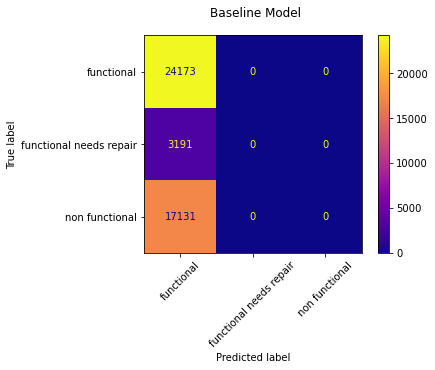

In [84]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()

fig.suptitle("Baseline Model")

plot_confusion_matrix(baseline_model, X_train, y_train, ax=ax, cmap="plasma")

plt.xticks(rotation=45);

In [85]:
#Now let's see how the model performs on data it's never seen (test set results)
baseline_model.predict(X_test)

cv_results = cross_val_score(baseline_model, X_test, y_test, cv=5)
display(cv_results)
np.median(cv_results)

array([0.54229862, 0.54229862, 0.5421443 , 0.5421443 , 0.54248146])

0.5422986181327941

Let's plot a ROC curve.

In [86]:
#pip install yellowbrick

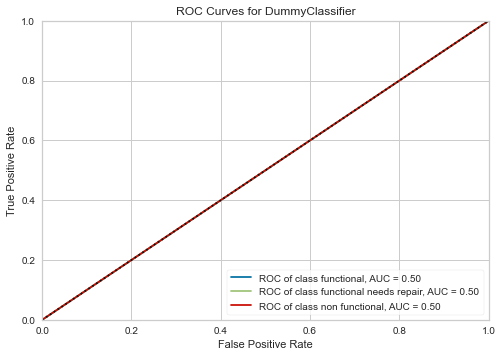

In [87]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, micro=False, macro=False)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer


plot_ROC_curve(baseline_model,X_train,y_train, X_test, y_test);

.5, as expected.

### Logistic Regression

Model 1 - Simple Logistic Regression

In [89]:
#X-train results
from sklearn.linear_model import LogisticRegression
logreg_model_simple = LogisticRegression(random_state=77, max_iter=10000, penalty='none')
logreg_model_simple.fit(X_train, y_train)

scores = cross_val_score(estimator=logreg_model_simple, X=X_train,
                        y=y_train, cv=5)
display(scores)
np.median(scores)

array([0.73716148, 0.7451399 , 0.74907293, 0.74952242, 0.74278009])

0.7451399033599281

Let's look at the coefficients.

In [154]:
sorted(list(zip(X_train.columns, logreg_model_simple.coef_[0])),
       key=lambda x: abs(x[1]), reverse=True)[:50]

[('quantity_dry', -1.5351615146475501),
 ('waterpoint_type_other', -0.6975144308388949),
 ('quantity_enough', 0.6260479195561773),
 ('management_private operator', 0.5671154092919065),
 ('waterpoint_type_improved spring', 0.5392548144375481),
 ('basin_Lake Nyasa', 0.4798484463916634),
 ('lga_Chunya', -0.4532848793229035),
 ('lga_Magu', -0.43288057074055863),
 ('source_rainwater harvesting', 0.41198776377113094),
 ('lga_Kondoa', -0.4111008068377491),
 ('lga_Iringa Rural', 0.409731327054698),
 ('quantity_seasonal', 0.4007694812092486),
 ('lga_Kongwa', 0.3967722415002731),
 ('district_code_30', 0.3955807879642474),
 ('waterpoint_type_communal standpipe multiple', -0.39152647568844134),
 ('district_code_33', -0.3544590827598093),
 ('extraction_type_afridev', 0.3540952271256464),
 ('management_vwc', -0.35304825794928063),
 ('lga_Singida Rural', 0.34318519889616633),
 ('water_quality_milky', 0.33220942749580684),
 ('district_code_53', -0.3306146876540288),
 ('region_code_11', 0.3243439932073

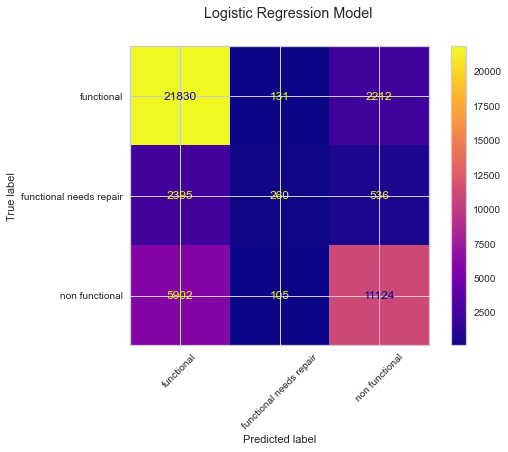

In [90]:
#Confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Model")

plot_confusion_matrix(logreg_model_simple, X_train, y_train, ax=ax, cmap="plasma")

plt.xticks(rotation=45);

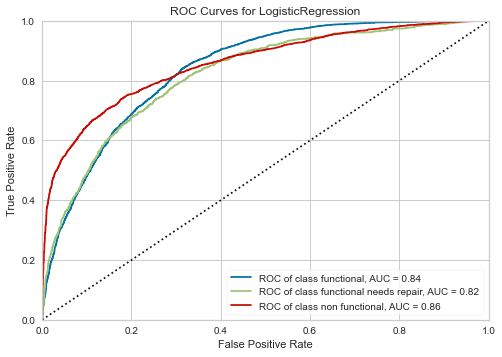

In [91]:
#ROC curve
plot_ROC_curve(logreg_model_simple,X_train,y_train, X_test, y_test);

#ROC helps us visualize a model's performance between sensitivity (recall) and specificity. 
#Sensitivity meaning the ability to correctly identify entries that fall into the positive class.
#Specificity meaning the ability to correctly identify entries that fall into the negative class.
#Plot of the model's true positive rate against the false positive rate.

In [160]:
logreg_model_simple.predict(X_test)

cv_results = cross_val_score(logreg_model_simple, X_test, y_test, cv=5)
display(cv_results)
np.median(cv_results)

array([0.74486013, 0.73946748, 0.73735671, 0.75151719, 0.74207687])

0.7420768712070128

### Model 2 - Standard Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [93]:
#let's see how it performed on the training data
logreg_model_ss = LogisticRegression(random_state=77, max_iter=1000, penalty='none')
logreg_model_ss.fit(X_train_scaled, y_train)

scores = cross_val_score(estimator=logreg_model_ss, X=X_train_scaled,
                        y=y_train, cv=5)
display(scores)
np.median(scores)

array([0.7443533 , 0.74828632, 0.75176986, 0.75502865, 0.74851107])

0.7485110686594

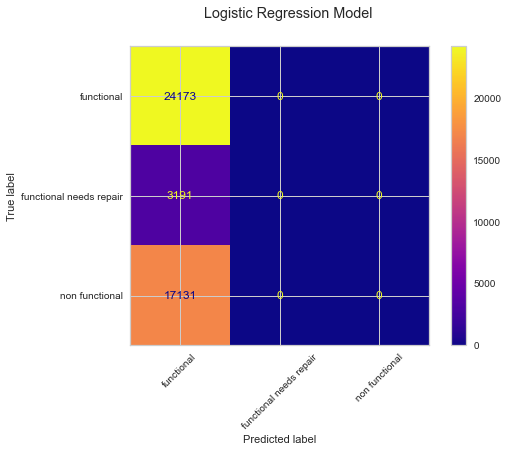

In [94]:
#confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Model")

plot_confusion_matrix(logreg_model_ss, X_train, y_train, ax=ax, cmap="plasma")

plt.xticks(rotation=45);

In [95]:
#let's see how it performed on the testing data
logreg_model_ss.score(X_test_scaled, y_test)

0.7503371089536138

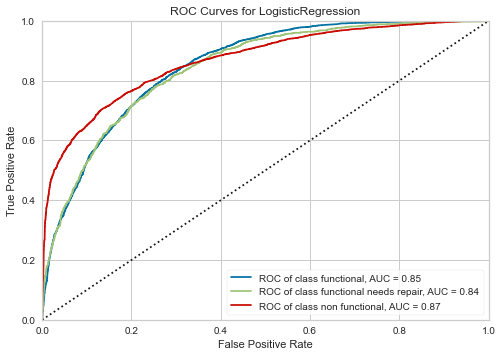

In [96]:
#plot ROC curve
plot_ROC_curve(logreg_model_ss,X_train_scaled,y_train, X_test_scaled, y_test);

### Model 3 - Regularization Penalty

Let's see how much regularization is needed to improve our model.

In [97]:
#Making a class to ease future work.
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=5):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 5)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

Let's test the below regularization value (C).

In [98]:
C_values = [0.01,0.1,1,10,100]

for c in C_values:
    logreg_model_simple_reg = LogisticRegression(random_state = 77, C=c, max_iter=10000)

    logreg_model_simple_reg.fit(X_train, y_train)
    logreg_model_simple_reg.predict(X_train)

    logreg_model_simple.fit(X_train, y_train)
    
    my_model_reg_results = ModelWithCV(
                        model=logreg_model_simple_reg,
                        model_name=f'Model 3 - Reg C={c:e}',
                        X=X_train, 
                        y=y_train
)
    # Saving variable for convenience
    model_results = my_model_reg_results

    # Print CV results
    model_results.print_cv_summary()


CV Results for `Model 3 - Reg C=1.000000e-02` model:
            0.73885 ± 0.00521 accuracy
        
CV Results for `Model 3 - Reg C=1.000000e-01` model:
            0.74199 ± 0.00568 accuracy
        
CV Results for `Model 3 - Reg C=1.000000e+00` model:
            0.74669 ± 0.00418 accuracy
        
CV Results for `Model 3 - Reg C=1.000000e+01` model:
            0.74451 ± 0.00477 accuracy
        
CV Results for `Model 3 - Reg C=1.000000e+02` model:
            0.74653 ± 0.00403 accuracy
        


Looks like regularization doesn't impact our results, so we'll keep C=1.

### Model 4 - Eliminating certain features

Let's remove the features that aren't performing well.

In [100]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(logreg_model_simple)

selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(max_iter=10000, penalty='none',
                                             random_state=77))

In [101]:
#let's see the threshold
thresh = selector.threshold_
thresh

0.3955348518243287

In [102]:
#let's see the coefficients
coefs = selector.estimator_.coef_
coefs

array([[ 8.16726249e-05,  1.48145400e-04,  5.05143670e-04,
         2.50646292e-05,  2.35235543e-02,  4.79848446e-01,
        -2.20353542e-01, -5.92927990e-02, -6.38031488e-02,
        -6.74847762e-03,  6.74638835e-02, -2.51756559e-01,
        -7.43425980e-02, -1.41198587e-02,  8.38021076e-02,
         3.24343993e-01, -2.79564031e-01,  1.00905731e-01,
         1.60008784e-01, -1.67690227e-01, -1.35956116e-01,
        -3.34498117e-02, -1.65012365e-01,  1.05705567e-01,
         1.02030610e-01, -2.41315507e-01, -8.66467755e-03,
         2.47771892e-01, -2.01496012e-01,  2.39465436e-01,
        -2.10598027e-04, -8.94426183e-02,  1.81693496e-01,
         5.03735466e-02,  2.39608869e-02, -1.67511948e-01,
        -1.12768395e-01,  6.60642738e-02, -2.70430136e-01,
         9.60447371e-02, -6.01968181e-02, -2.38191145e-01,
        -1.36926658e-01,  3.10640651e-03,  1.54138936e-01,
         5.81914662e-02,  3.95580788e-01, -3.54459083e-01,
         9.63591591e-02,  1.37594963e-01,  2.23795020e-0

In [103]:
#number of features after narrowing down via threshold
coefs[coefs > thresh].shape

(22,)

In [104]:
#see determination for each column
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

dict(zip(X_train_df.columns, selector.get_support()))

{'gps_height': False,
 'population': False,
 'construction_year': False,
 'age_well': False,
 'basin_Internal': False,
 'basin_Lake Nyasa': True,
 'basin_Lake Rukwa': True,
 'basin_Lake Tanganyika': False,
 'basin_Lake Victoria': False,
 'basin_Pangani': True,
 'basin_Rufiji': False,
 'basin_Ruvuma / Southern Coast': True,
 'basin_Wami / Ruvu': False,
 'region_code_1': True,
 'region_code_10': False,
 'region_code_11': True,
 'region_code_12': True,
 'region_code_13': True,
 'region_code_14': True,
 'region_code_15': False,
 'region_code_16': True,
 'region_code_17': True,
 'region_code_18': False,
 'region_code_19': False,
 'region_code_2': False,
 'region_code_20': True,
 'region_code_21': False,
 'region_code_24': True,
 'region_code_3': True,
 'region_code_4': True,
 'region_code_40': False,
 'region_code_5': True,
 'region_code_6': True,
 'region_code_60': False,
 'region_code_7': False,
 'region_code_8': False,
 'region_code_80': False,
 'region_code_9': False,
 'region_code_90':

In [105]:
#function to select the most important columns
def select_important_features(X, selector):
    """
    Given a DataFrame and a selector, use the selector to choose
    the most important columns
    """
    imps = dict(zip(X.columns, selector.get_support()))
    selected_array = selector.transform(X)
    selected_df = pd.DataFrame(selected_array,
                               columns=[col for col in X.columns if imps[col]],
                               index=X.index)
    return selected_df

In [106]:
#training/test data feature selection
X_train_selected = select_important_features(X=X_train_df, selector=selector)
X_test_selected = select_important_features(X=X_test_df, selector=selector)

In [107]:
#running the model
logreg_sel = LogisticRegression(random_state=77, max_iter=1000)

logreg_sel.fit(X_train_selected, y_train)

LogisticRegression(max_iter=1000, random_state=77)

In [108]:
#training-score
scores = cross_val_score(estimator=logreg_sel, X=X_train_selected,
                        y=y_train, cv=5)
display(scores)
np.median(scores)

array([0.73693673, 0.73929655, 0.74322958, 0.75087088, 0.74289246])

0.7428924598269468

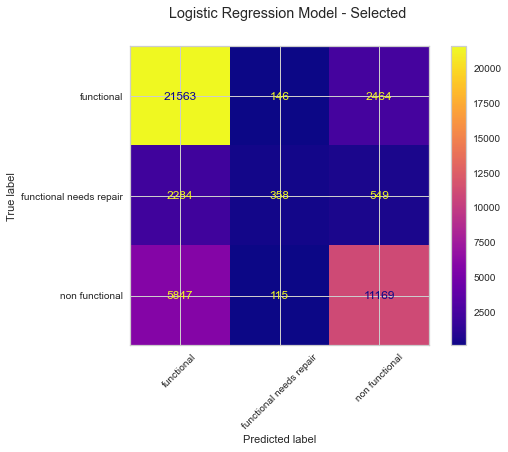

In [109]:
#confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Model - Selected")

plot_confusion_matrix(logreg_sel, X_train_selected, y_train, ax=ax, cmap="plasma")

plt.xticks(rotation=45);

In [110]:
#test-score
logreg_sel.score(X_test_selected, y_test)

0.7424487594390508

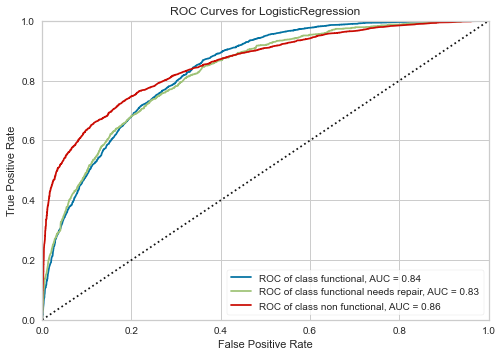

In [111]:
#ROC curve
plot_ROC_curve(logreg_sel,X_train_selected,y_train, X_test_selected, y_test);

It looks like the scores are consistent over every iteration of Logistic Regression we've tried, so let's just take the most simple model (first model) as our final Logistic Regression model.

## KNN

In [165]:
#re-declare X and y
X = df_MAIN.drop('status_group', axis=1)
y = df_MAIN['status_group']

In [166]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = [3,5,10,25]

for x in k:
    knn = KNeighborsClassifier(x)

    knn.fit(X_train_scaled, y_train)
    scores = cross_val_score(estimator=knn, X=X_train_scaled,
                y=y_train, cv=5)
    print('Neighbors=', x)
    print('Training:', np.median(scores))
    print('Test:', knn.score(X_test_scaled, y_test))
    

### Decision Tree

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

In [118]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=77)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=77)

In [119]:
#training-score
scores = cross_val_score(estimator=dt, X=X_train,
               y=y_train, cv=5)
np.median(scores)

0.7478368355995055

In [120]:
#test-score
dt.score(X_test, y_test)

0.7569444444444444

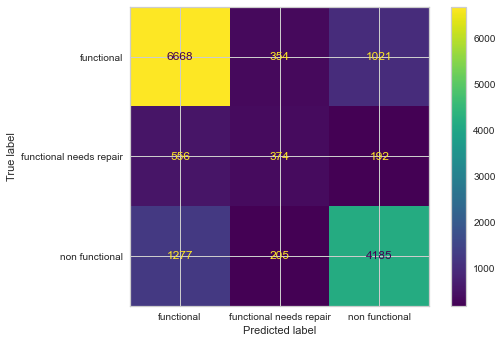

In [121]:
#confusion matrix
plot_confusion_matrix(dt,X_test,y_test)

In [122]:
#let's try different depths to stop it from running too l ong
depth = [10, 25, 50, 75, 100]
for x in depth:
    dt = DecisionTreeClassifier(max_depth=x)
    dt.fit(X_train, y_train)

    # Accuracy on training data & test data
    print('Depth =', x)
    print('Training:', dt.score(X_train, y_train))
    print('Testing:', dt.score(X_test, y_test))
    
#depth 25 is the best?

Depth = 10
Training: 0.7539723564445443
Testing: 0.7382686084142395
Depth = 25
Training: 0.8870210135970333
Testing: 0.76611380798274
Depth = 50
Training: 0.9437015394988201
Testing: 0.7571467098166127
Depth = 75
Training: 0.9443757725587144
Testing: 0.7546521035598706
Depth = 100
Training: 0.9443757725587144
Testing: 0.7551914778856527


Decision Tree with depth of 25 seems to be the best Decision Tree model.

### Random Forest

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier

rfr = RandomForestClassifier(max_features='sqrt',
                            max_samples=0.5,
                            random_state=77)

In [124]:
#fit our model
rfr.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.5, random_state=77)

In [125]:
#training-score
scores = cross_val_score(estimator=rfr, X=X_train,
               y=y_train, cv=5)
scores

array([0.79525789, 0.78941454, 0.79110012, 0.79424654, 0.79211147])

In [126]:
#test-score
score = rfr.score(X_test, y_test)
score

0.7988807982740022

In [127]:
#lets see which features are the best
feat_import = {name: score 
                   for name, score 
                       in zip(X_train.columns, rfr.feature_importances_)
}
feat_import

{'gps_height': 0.12147513276145377,
 'population': 0.07081780215194135,
 'construction_year': 0.05956039833179953,
 'age_well': 0.0583722959915368,
 'basin_Internal': 0.004653193720468278,
 'basin_Lake Nyasa': 0.0035234193917081363,
 'basin_Lake Rukwa': 0.00255492743440417,
 'basin_Lake Tanganyika': 0.0036762134179593236,
 'basin_Lake Victoria': 0.004113863767657591,
 'basin_Pangani': 0.0032286090316782775,
 'basin_Rufiji': 0.0036040586250145686,
 'basin_Ruvuma / Southern Coast': 0.0034250295270683937,
 'basin_Wami / Ruvu': 0.0033309107218211444,
 'region_code_1': 0.0015847745969639101,
 'region_code_10': 0.0015073497421771087,
 'region_code_11': 0.004953528825068796,
 'region_code_12': 0.00188320350641845,
 'region_code_13': 0.0014169755316619415,
 'region_code_14': 0.0012265585891604888,
 'region_code_15': 0.0016492365686763776,
 'region_code_16': 0.0025160418351489106,
 'region_code_17': 0.002894863119358155,
 'region_code_18': 0.0018024694823613934,
 'region_code_19': 0.00191537729